# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# План

* Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/games.csv. Скачать датасет  
* Шаг 2. Подготовьте данные
Замените названия столбцов (приведите к нижнему регистру);
Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
Обработайте пропуски при необходимости:
  
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
* Шаг 3. Проведите исследовательский анализ данных
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
* Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?
* Шаг 5. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.
* Шаг 6. Напишите общий вывод
Оформление: Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

# Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Шаг 1: Изучим общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')

Посмотрим на наши данные:

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Взглянем на информацию нашего df:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Узнаем количество пропусков в нашем df:

In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

# Шаг 2: Подготовка данных

## Заменим названия столбцов (приведем к нижнему регистру):

In [6]:
df.columns = df.columns.str.lower() # преводим колонки к нижнему регистру

for column in df[['name', 'platform', 'genre', 'rating']]: # приводим к нижнему регистру строки в данных столбцах
    df[column] = df[column].str.lower()

df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,ds,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,e
7,wii play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,e
8,new super mario bros. wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,e
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## Преобразуем данные в нужные типы:

In [7]:
df.info() # взглянем на типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
df['critic_score'].unique() # смотрим уникальные значения

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [9]:
df['user_score'].unique() # смотрим уникальные значения

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

* year_of_release у нас имеет тип float, а должен иметь тип int, так как год это целое число;
* critic_score мы просмторели его уникальные значения и видим, что оценки критиков имеют целые значения так что поменяют у него тип на int;
* user_score имеет тип object, а должен иметь тип float;

в user_score у нас имеются значения "tbd", оно имеет расширофку to be determined, to be done, что означает что данные нарочно были не заполнены (возможно потому что не определились с оценкой пользователей). Так что заменим tbd на NaN. А затем сменим тип у user_score на float.

In [10]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = df['critic_score'].astype('Int64')
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)
df['user_score'] = df['user_score'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


## Обработаем пропуски:

Оценим количество пропусков:

In [11]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Взглянем на name и genre:

In [12]:
df.loc[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


у нас по 2 пропуска в name и genre, можем заметить что строки совпадают. Так же можем подметить, что эти игры игры старые, так что удалим эти строки из df.

In [13]:
df.dropna(subset='name', inplace=True)

Заменим пропуски year_of_release(год выпуска) таким образом, что если в year_of_release есть пропуск, то найдем игру с тем же названием из нашего df и возьмем его значение года выпуска.

In [14]:
for index in df.loc[df['year_of_release'].isnull() == True].index:
    df['year_of_release'][index] = df.loc[df['name'] == df['name'][index], 'year_of_release'].max()

df['year_of_release'].isna().sum()

146

в  итоге пропусков стало меньше.

В critic_score(оценка критиков), user_score(оценка игроков) не будем заполнять пропуски, так как это может повлиять в будущем на исследования

Взглянем на rating:

In [15]:
df['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

* EC - для всех старше 3 лет
* K-A - 6+ лет версия до 1997 года
* E10+ - для всех старше 10 лет
* Т - для всех старше 13 лет
* M - для всех старше 17 лет
* RP - ожидается рейтинг 17+, окончательный рейтинг еще не присвоен
* AO - для всех взрослых старше 18 лет
* E - для всех

Заполним пропуски не опрделенным рейтингом:

In [16]:
df['rating'] = df['rating'].fillna('undefined')

Взглянем на полученный результат:

In [17]:
df.isna().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

## Cуммарные продажи во всех регионах:

In [18]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df = df[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales', 'critic_score', 'user_score', 'rating']] # для удобства
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,82.54,76,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,40.24,<NA>,NaN,undefined
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,35.52,82,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,32.77,80,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,31.38,<NA>,NaN,undefined
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,30.26,<NA>,NaN,undefined
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,29.80,89,8.5,e
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,28.91,58,6.6,e
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,28.32,87,8.4,e
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,28.31,<NA>,NaN,undefined


# Шаг 3: Исследовательский анализ данных

## Посмотрим, сколько игр выпускалось в разные годы. Узнаем важнность данных за все периоды:

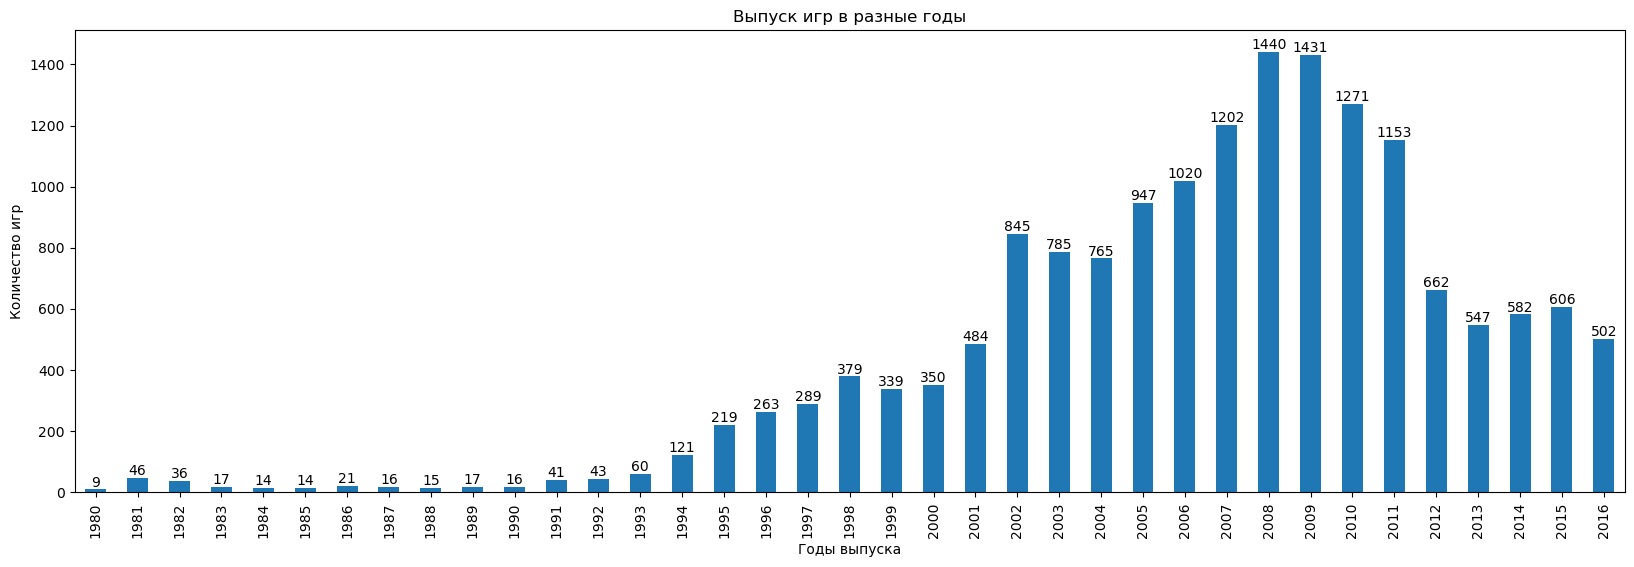

In [19]:
plt.figure(figsize=(20, 6)) 
ax = df.groupby('year_of_release')['name'].count().plot(kind='bar')
ax.bar_label(ax.containers[0]) # значения
plt.title('Выпуск игр в разные годы')
plt.xlabel('Годы выпуска')
plt.ylabel('Количество игр')
plt.show()

Мы можем наблюдать на графике активный рост в выпуске игр в промежутке с 1990 года по 2009 год(максимальное количество выпущенных игр в 2008 году - 1440 игр). Дальше мы видим спад в консольном и компьютерном гейминге, можем сделать вывод, что на это повлиял мобильный гейминг. В промежутке с 2012 по 2016 год выходит примено одинаковое количество игр.

## Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. И узнаем за какой характерный срок появляются новые и исчезают старые платформы:

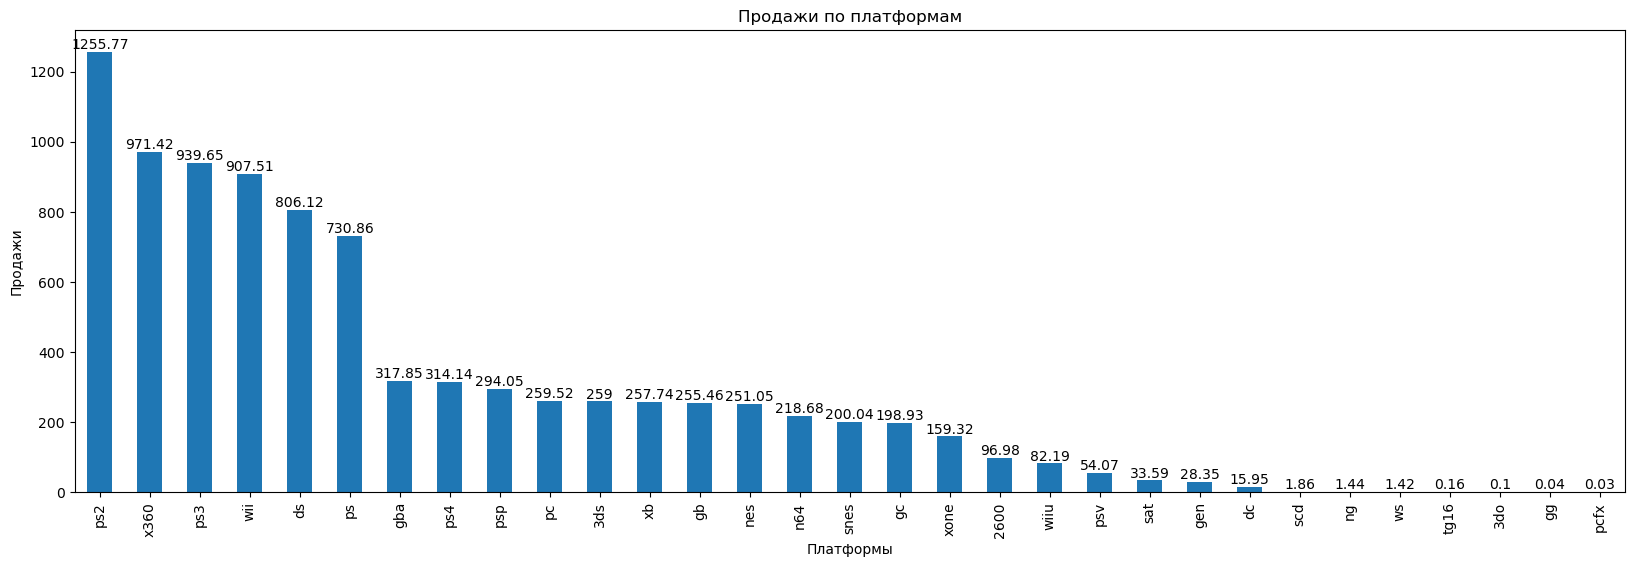

In [20]:
plt.figure(figsize=(20, 6)) 
ax = df.groupby('platform')['all_sales'].sum().sort_values(ascending=False).plot(kind='bar')
ax.bar_label(ax.containers[0]) # значения
plt.title('Продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

Из графика мы видим, что большинство продаж у данных платформ:
- ps2;
- x360;
- ps3;
- wii;
- ds;
- ps;

In [21]:
df.groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(6)

platform
ps2     1255.77
x360     971.42
ps3      939.65
wii      907.51
ds       806.12
ps       730.86
Name: all_sales, dtype: float64

Возьмем популярные платформы и построим к ним графики:

In [22]:
# Создаем собственные функции для удобства:
def year_all_sale_for_platform(name, data):
    """
    делаем pivot_table под определенную платформу где:
    index = год релиза;
    values = продажам;
    aggfunc = сумме;
    """
    return data.loc[data['platform'] == name].pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)

def year_game_count_for_platform(name, data):
    """
    делаем pivot_table под определенную платформу где:
    index = год релиза;
    values = название игры;
    aggfunc = количество;
    """
    return data.loc[data['platform'] == name].pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values('year_of_release', ascending=False)

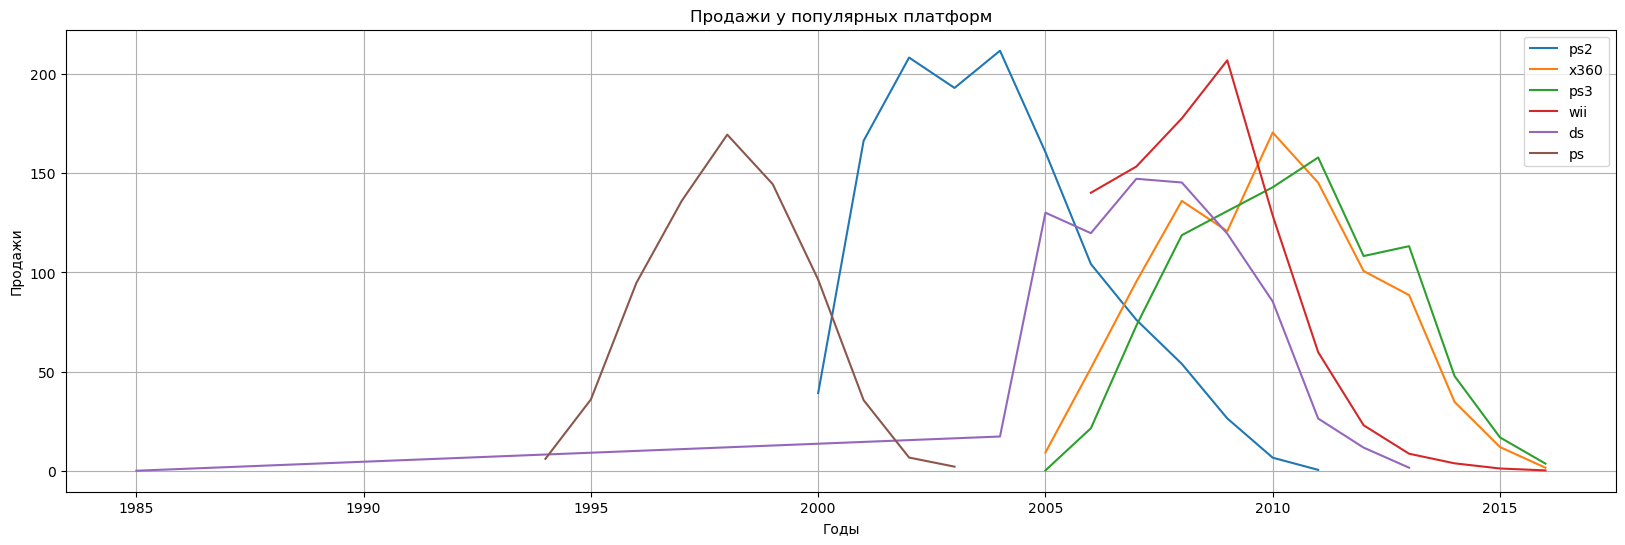

In [23]:
top_platform_sales = df.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False).reset_index()

top_platform_sales_list = [] # пустой список топовых платформ
for platform in top_platform_sales.head(6)['platform']: # добавляем платформы в наш список
    top_platform_sales_list.append(platform)

plt.figure(figsize=(20, 6))
for platform in top_platform_sales_list: # строим графики к топовым платформам
    sns.lineplot(data=year_all_sale_for_platform(platform, df)['all_sales'], label=platform)
plt.title('Продажи у популярных платформ')
plt.xlabel('Годы')
plt.ylabel('Продажи')
plt.grid()
plt.show()

- У ds самая долгая жизнь получилась;
- у всех кроме ds пик наступает спустя 5 лет после выхода консоли
- у wii самый быстрый скачок по продажам

Взглянем на характерный срок появления новых и исчезновения старых платформ:

In [24]:
platform_life = df.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index() # найдем минимальные и максимальные годы, чтобы определить жизнь платформы
platform_life.columns = ['platform', 'min_year', 'max_year']
platform_life['life'] = platform_life['max_year'] - platform_life['min_year']
platform_life.sort_values(by='life', ascending=False).head(5)

,platform,min_year,max_year,life
13,pc,1985,2016,31
4,ds,1985,2013,28
0,2600,1980,2002,22
5,gb,1988,2001,13
28,x360,2005,2016,11


Средняя жизнь топовых платформ:

In [25]:
platform_life.loc[platform_life['platform'].isin(top_platform_sales_list), 'life'].mean()

13.333333333333334

Средняя жизнь всех платформ:

In [26]:
platform_life['life'].mean()

8.161290322580646

Медиана жизни платформ:

In [27]:
platform_life['life'].median()

7.0

Нам надо спрогнозировать продажи на следующий год, для этого надо взять актуальный период. Так как игровая индустрия быстро развивается, то платформы довольно быстро устаревают из-за нехватки мощности для новых игр и на их место приходят обновленные новые платформы с актуальным железом. Мы знаем что топовые платформы в среднем живут 13 лет, а их пик наступает на середине их существования (13 / 2 = 6.5). Следовательно актуальным периодом будет с 2010 год(2016 - 6) по 2016 год для прогноза на будущий год.

Актуальный период 2010 - 2016:

In [28]:
actual_years = df.loc[df['year_of_release'] >= 2010].reset_index(drop=True)
actual_years.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score
count,5323.000000,5323.000000,5323.000000,5323.000000,5323.000000,5323.000000,2340.000000,2524.000000
mean,2012.346045,0.213686,0.158986,0.057394,0.050547,0.480612,70.463248,6.682805
std,2.031349,0.610725,0.462459,0.226200,0.150058,1.231204,13.520365,1.518035
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,0.200000
25%,2011.000000,0.000000,0.000000,0.000000,0.000000,0.040000,62.000000,5.900000
50%,2012.000000,0.050000,0.020000,0.000000,0.010000,0.130000,73.000000,7.000000
75%,2014.000000,0.180000,0.130000,0.040000,0.040000,0.400000,80.000000,7.800000
max,2016.000000,15.000000,9.090000,5.650000,3.960000,21.820000,97.000000,9.300000


In [29]:
# список актуальных платформ
actual_platform_list = []
for platform in actual_years['platform'].unique():
    actual_platform_list.append(platform)
actual_platform_list

['x360',
 'ps3',
 'ds',
 'ps4',
 '3ds',
 'wii',
 'xone',
 'wiiu',
 'pc',
 'psp',
 'psv',
 'ps2']

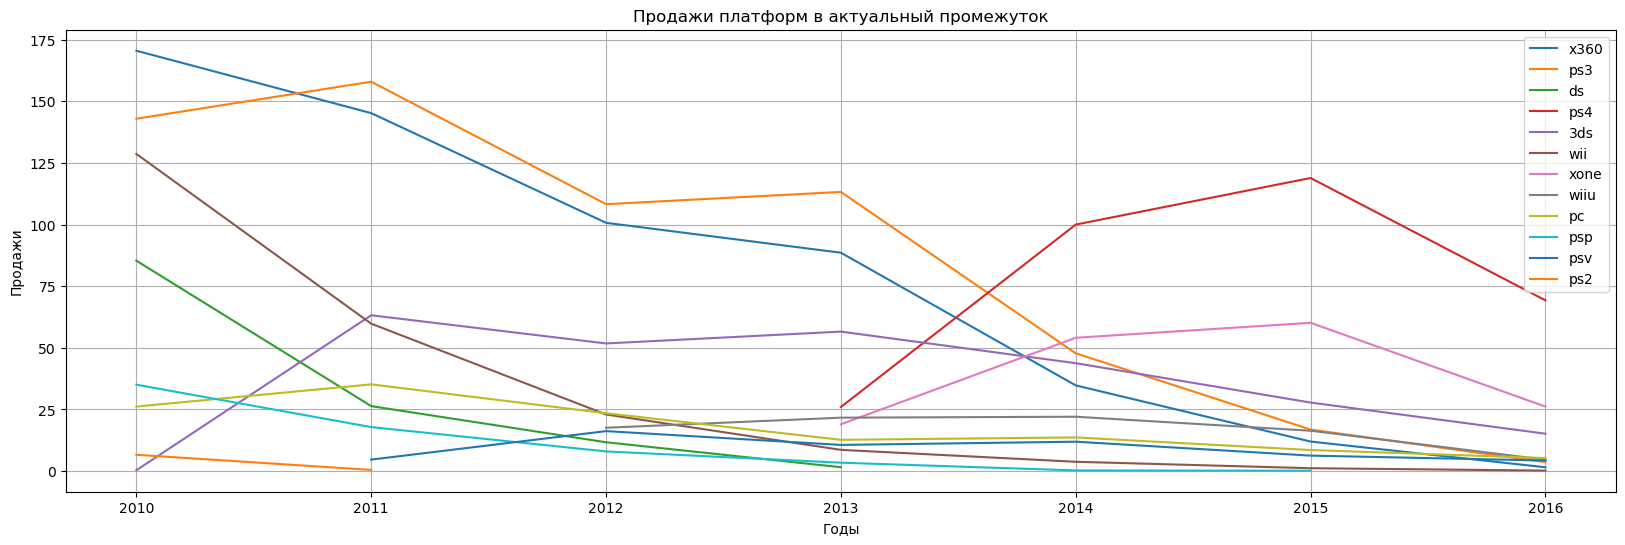

In [30]:
plt.figure(figsize=(20, 6))
for platform in actual_platform_list:
    sns.lineplot(data=year_all_sale_for_platform(platform, actual_years)['all_sales'], label=platform)
plt.title('Продажи платформ в актуальный промежуток')
plt.xlabel('Годы')
plt.ylabel('Продажи')
plt.grid()
plt.show()

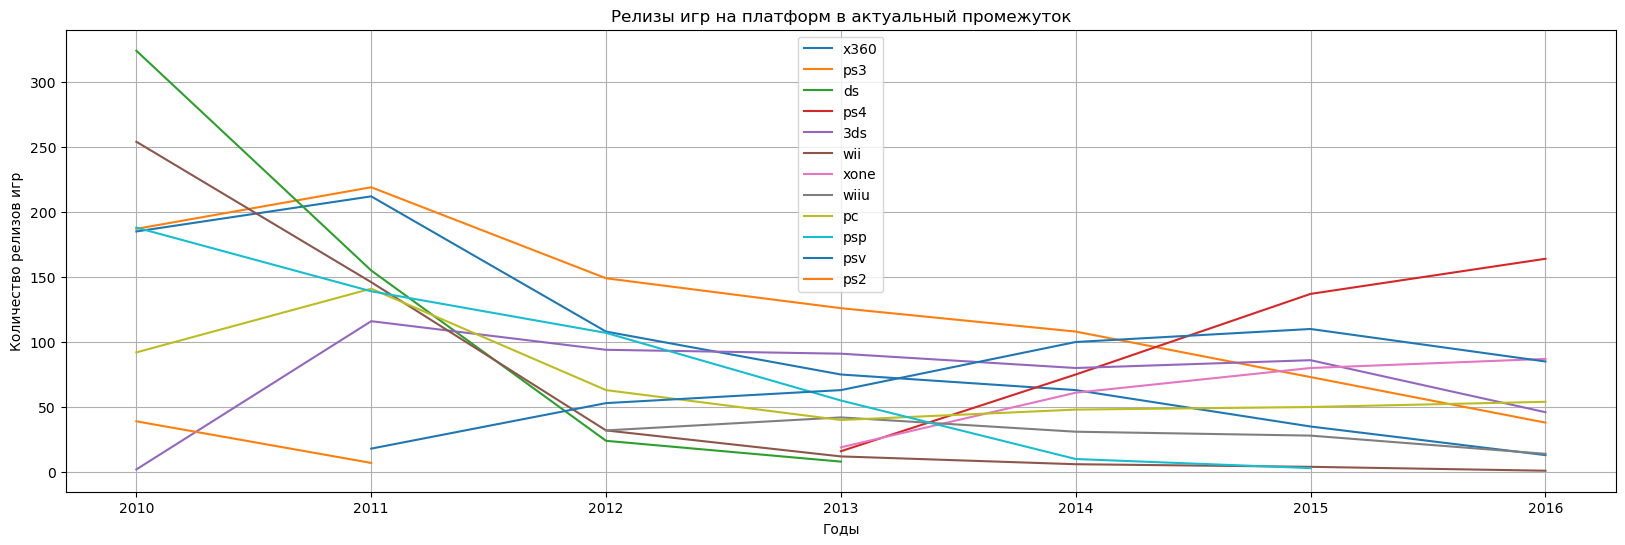

In [31]:
plt.figure(figsize=(20, 6))
for platform in actual_platform_list:
    sns.lineplot(data=year_game_count_for_platform(platform, actual_years)['name'], label=platform)
plt.title('Релизы игр на платформ в актуальный промежуток')
plt.xlabel('Годы')
plt.ylabel('Количество релизов игр')
plt.grid()
plt.show()

- Исходя из графиков за актуальный промежуток времени мы наблюдаем за спадом продаж игр на данных платформах, данный факт оказывает влияние на релизы игр;
- Выделяются платформы xone и ps4, так как они более новые(2013 год) с обновленным железом, у них продажи игр растут к 2016 году, а исходя из этого и релизы на данные платформы

## Глобальные продажи игр по платформам:

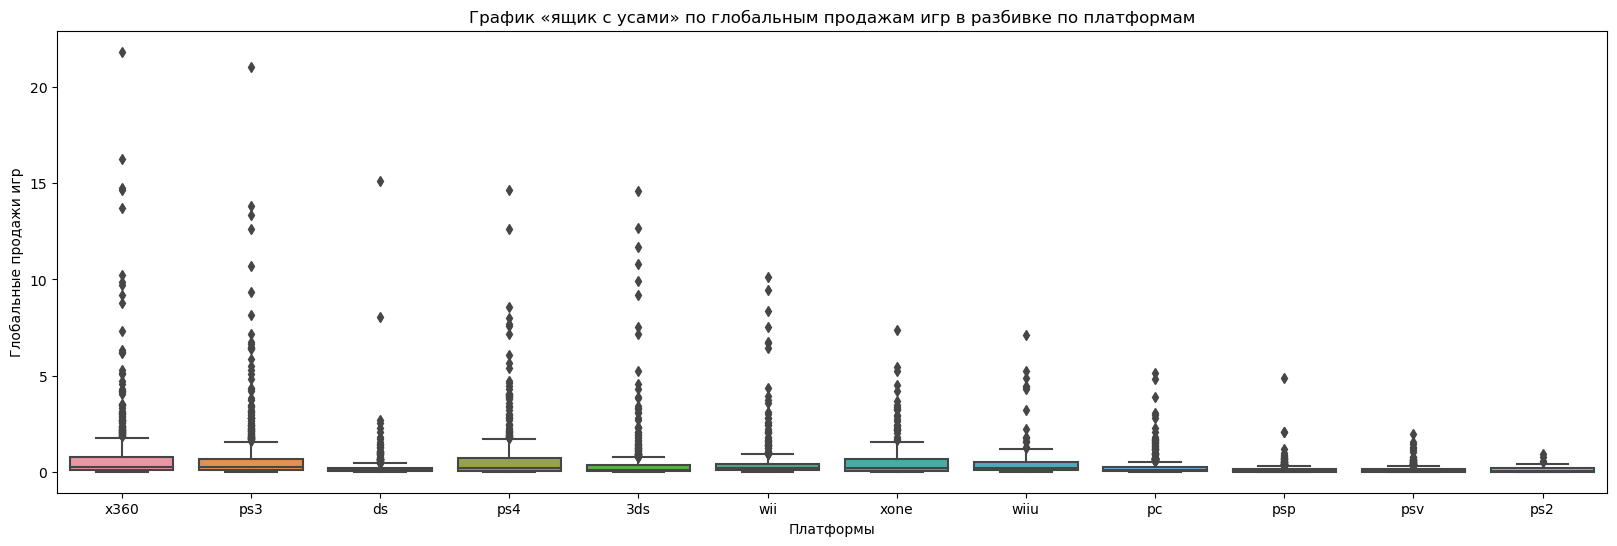

In [32]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=actual_years, x='platform', y='all_sales')
plt.title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформы')
plt.ylabel('Глобальные продажи игр')
plt.show()

Взглянем на этот же график в промежутке от 0 до 2 млн глобальных продаж игр:

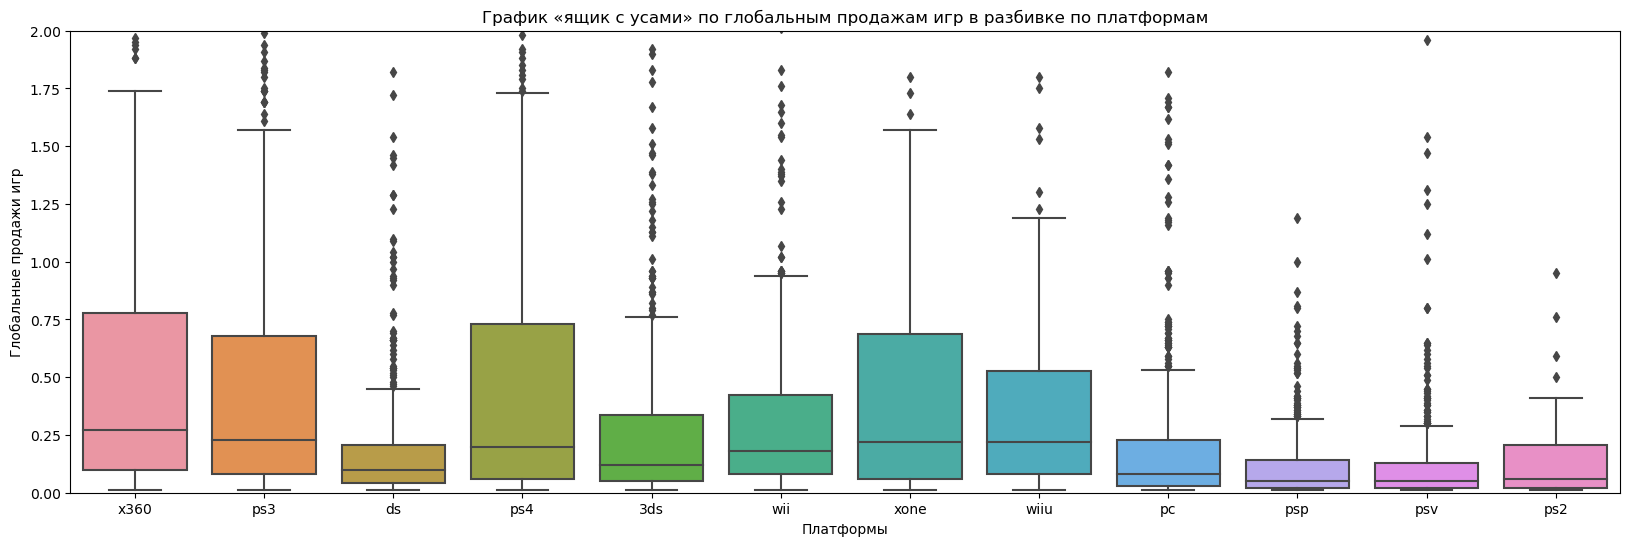

In [33]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=actual_years, x='platform', y='all_sales')
plt.title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформы')
plt.ylabel('Глобальные продажи игр')
plt.ylim(0, 2)
plt.show()

- у данных платформ (x360, ps3, ps4, wii, xone, wiiu) медианные значения продажи примерно равны;
- у данных платформ (x360, ps3, ps4, xone, wiiu) максимальный размах в продаже игр. Наибольшим показателем обладает платформа x360

## Посмотрим, как влияют продажи внутри популярной платформы (x360) от оценки пользователей и критиков:

### Продажи и релизы игр на платформе x360:

In [34]:
top1_platform = actual_years.loc[actual_years['platform'] == 'x360'] # df платформы x360 в актуальный промежуток

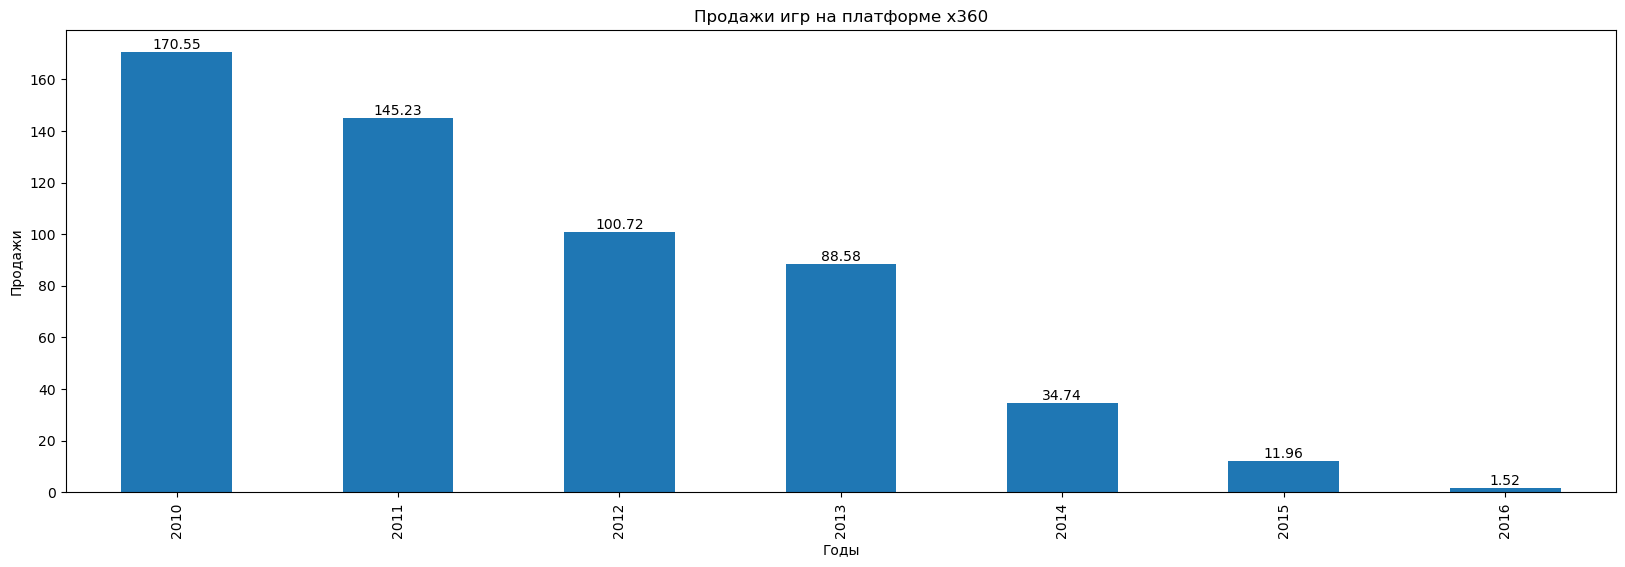

In [35]:
plt.figure(figsize=(20, 6))
ax = top1_platform.groupby('year_of_release')['all_sales'].sum().plot(kind='bar')
ax.bar_label(ax.containers[0]) # значения
plt.title('Продажи игр на платформе x360')
plt.xlabel('Годы')
plt.ylabel('Продажи')
plt.show()

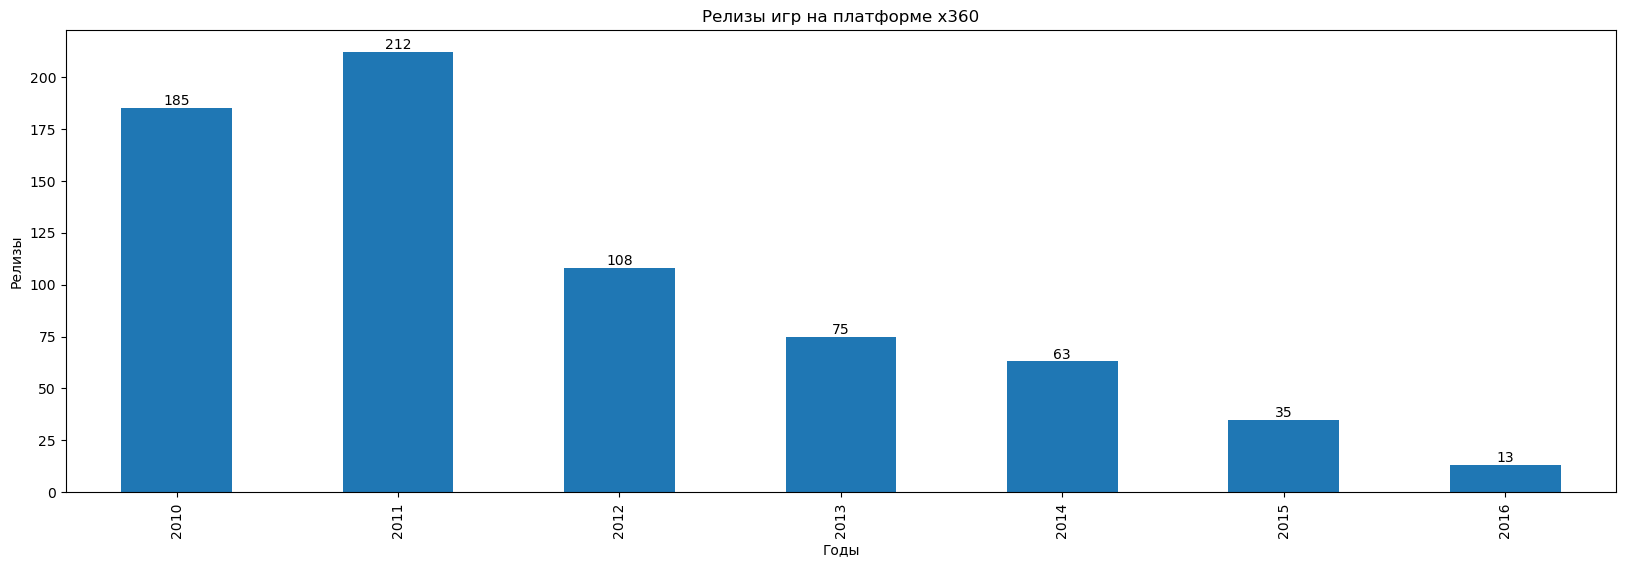

In [36]:
plt.figure(figsize=(20, 6))
ax = top1_platform.groupby('year_of_release')['name'].count().plot(kind='bar')
ax.bar_label(ax.containers[0]) # значения
plt.title('Релизы игр на платформе x360')
plt.xlabel('Годы')
plt.ylabel('Релизы')
plt.show()

На данных графиках мы видим, что в 2010-2011 годах у платформы x360 являются успешными, дальше наблюдаем стримительным спад продаж и игровых релизов из года в год. Это нам говорит о том, что данная платформа устаревает и на её место придет новая платформа с обновленным железом.

### Влиянение на продажи игр на платформе x360 от оценки критиков и пользователей:

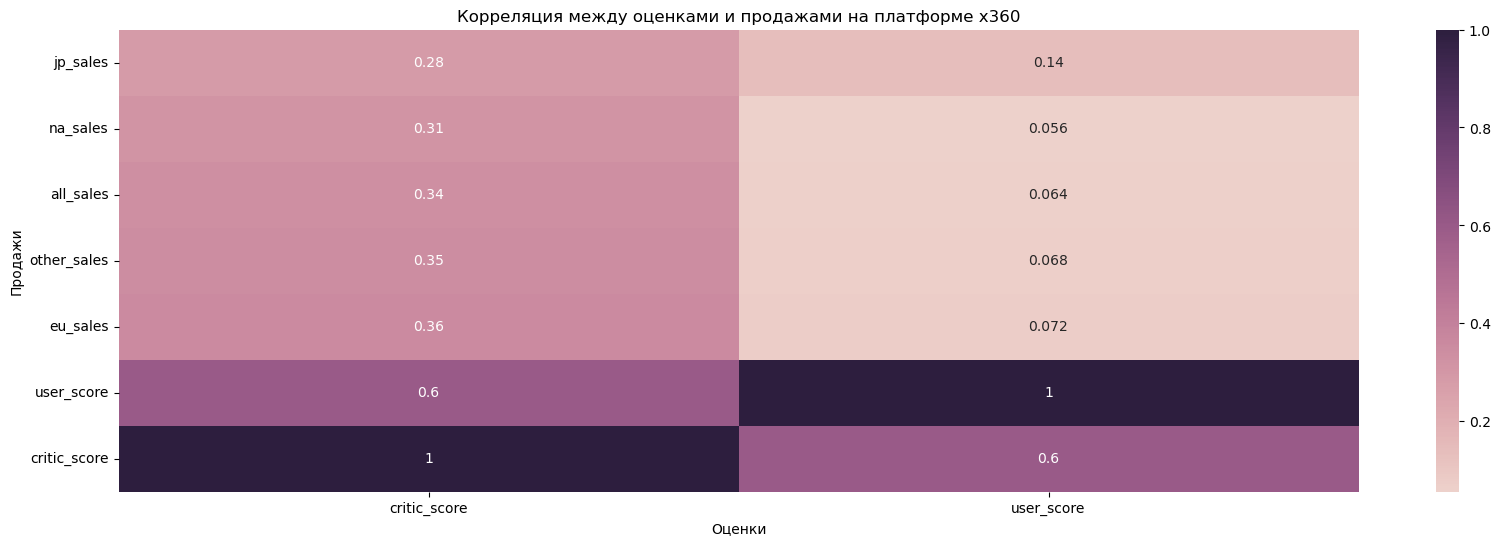

In [37]:
plt.figure(figsize=(20, 6))
{
    sns.heatmap((top1_platform[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', # нужные данные для графика
                                'all_sales', 'critic_score', 'user_score']]
    .corr()[['critic_score', 'user_score']] # корреляция
    .sort_values(by='critic_score')), # сортируем
    annot=True, cmap=sns.cubehelix_palette(as_cmap=True)) # настройки heatmap
}
plt.title('Корреляция между оценками и продажами на платформе x360')
plt.xlabel('Оценки')
plt.ylabel('Продажи')
plt.show()

- наименьшая корреляция от оценки критиков наблюдается в японских продажах;
- наибольшая корреляция от оценки критиков наблюдается в европейских продажах;
- наименьшая корреляция от оценки пользоватлей наблюдается в американских продажах;
- наибольшая корреляция от оценки пользоватлей наблюдается в японских продажах;
- так же можем заметить что у оценки критиков корреляция на много выше, чем у пользователей;

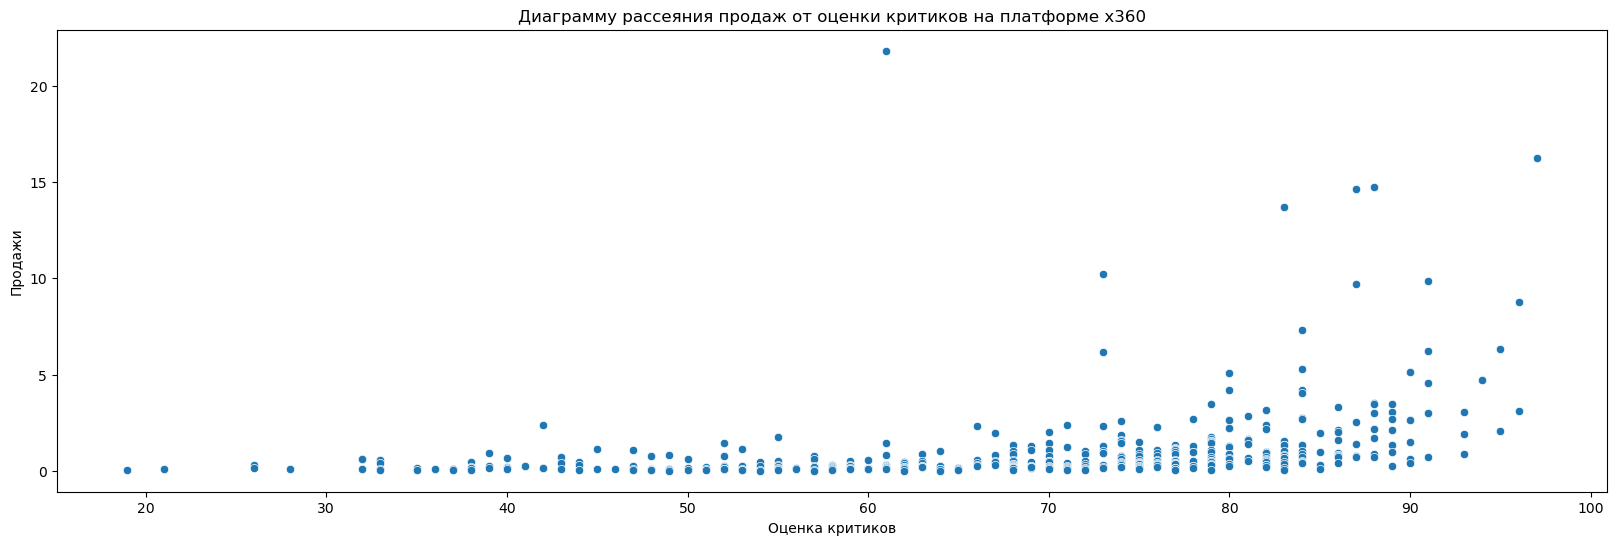

In [38]:
plt.figure(figsize=(20, 6))
sns.scatterplot(data=top1_platform, x='critic_score', y='all_sales')
plt.title('Диаграмму рассеяния продаж от оценки критиков на платформе x360')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

Видим что принципе, если критики оценивают игру в 70+ баллов то и продадажи в логическом порядке растут

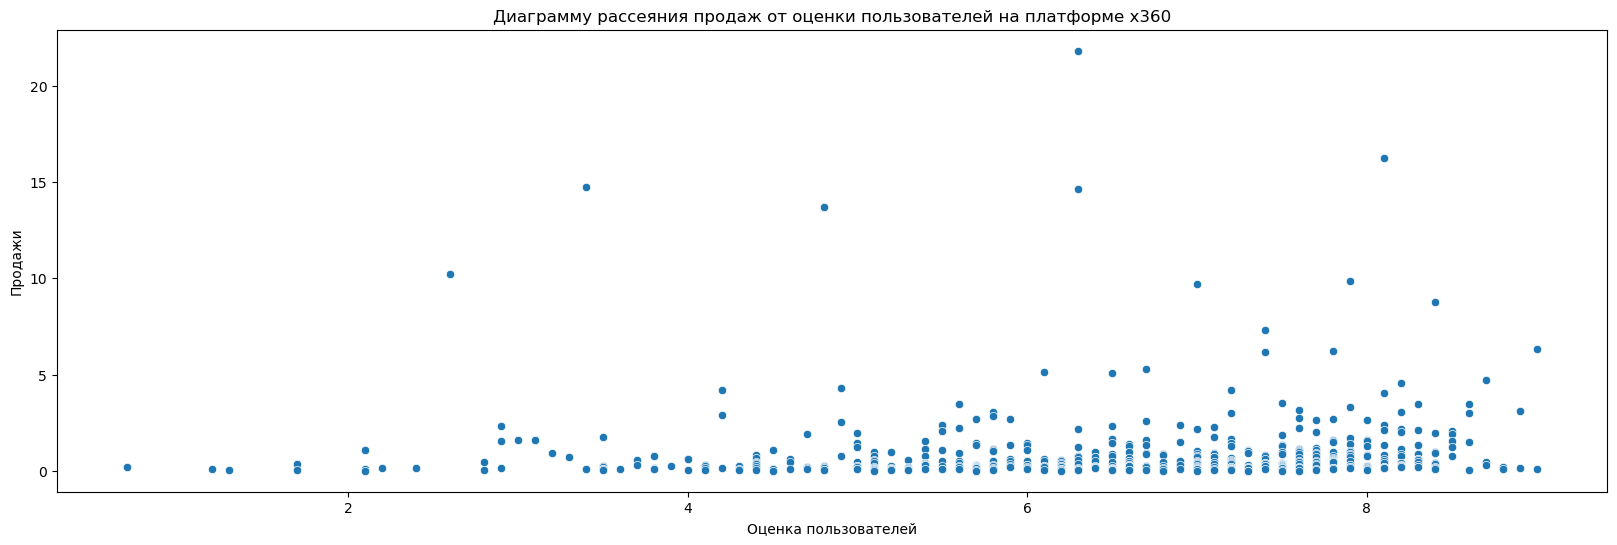

In [39]:
plt.figure(figsize=(20, 6))
sns.scatterplot(data=top1_platform, x='user_score', y='all_sales')
plt.title('Диаграмму рассеяния продаж от оценки пользователей на платформе x360')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

Наблюдаем очень слабую зависимость продаж от оценок пользователей

## Посмотрим, как влияют продажи у других платформ от оценки пользователей и критиков:

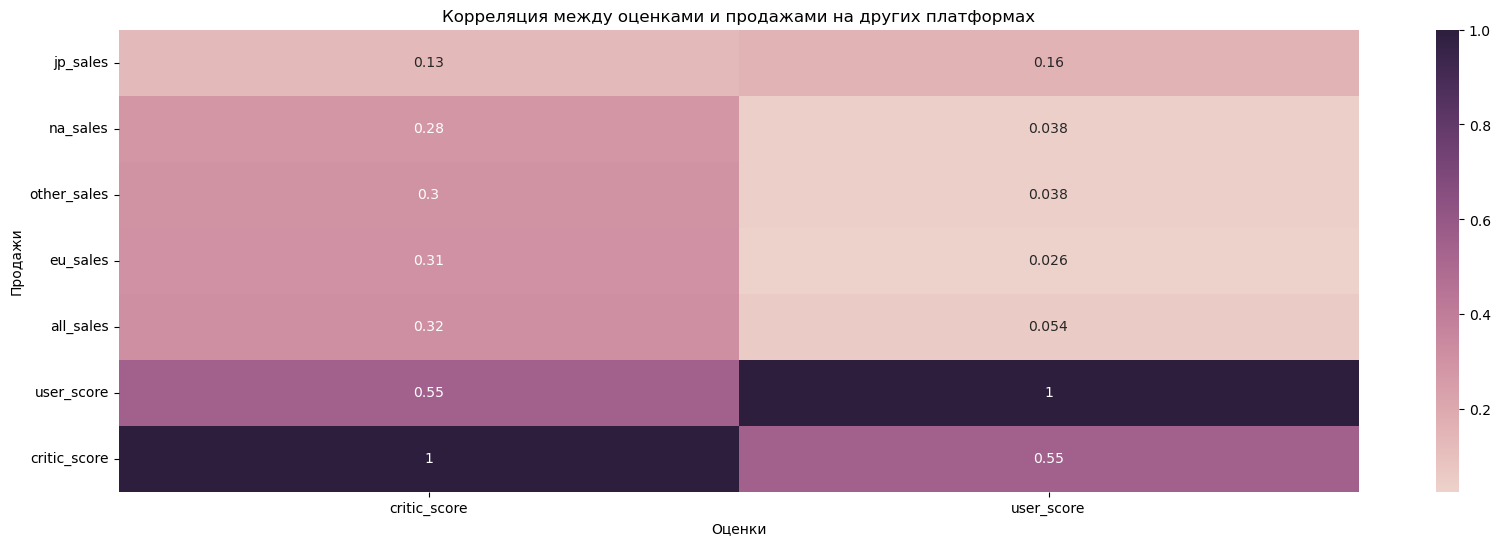

In [40]:
plt.figure(figsize=(20, 6))
{
    sns.heatmap((actual_years[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', # нужные данные для графика
                                'all_sales', 'critic_score', 'user_score']]
    .corr()[['critic_score', 'user_score']] # корреляция
    .sort_values(by='critic_score')), # сортируем
    annot=True, cmap=sns.cubehelix_palette(as_cmap=True)) # настройки heatmap
}
plt.title('Корреляция между оценками и продажами на других платформах')
plt.xlabel('Оценки')
plt.ylabel('Продажи')
plt.show()

- наименьшая корреляция от оценки критиков на других платформах, так же сохранилась, как и у платформы x360 - наблюдается в японских продажах;
- у других платформ наибольшая корреляция от оценки критиков наблюдается в подажах других странах(0.3), европейских(0.31) и в общих(0.32);
- наибольшая корреляция от оценки пользователей на других платформах наблюдается в японских продажах;
- наименьшая корреляция от оценки пользователей на других платформах наблюдается в европейских продажах;
- тут картина выглядит так же, как и с платформой x360. На других платформах оценки критиков сильнее влияют на продажи игр, чем оценки пользователей;

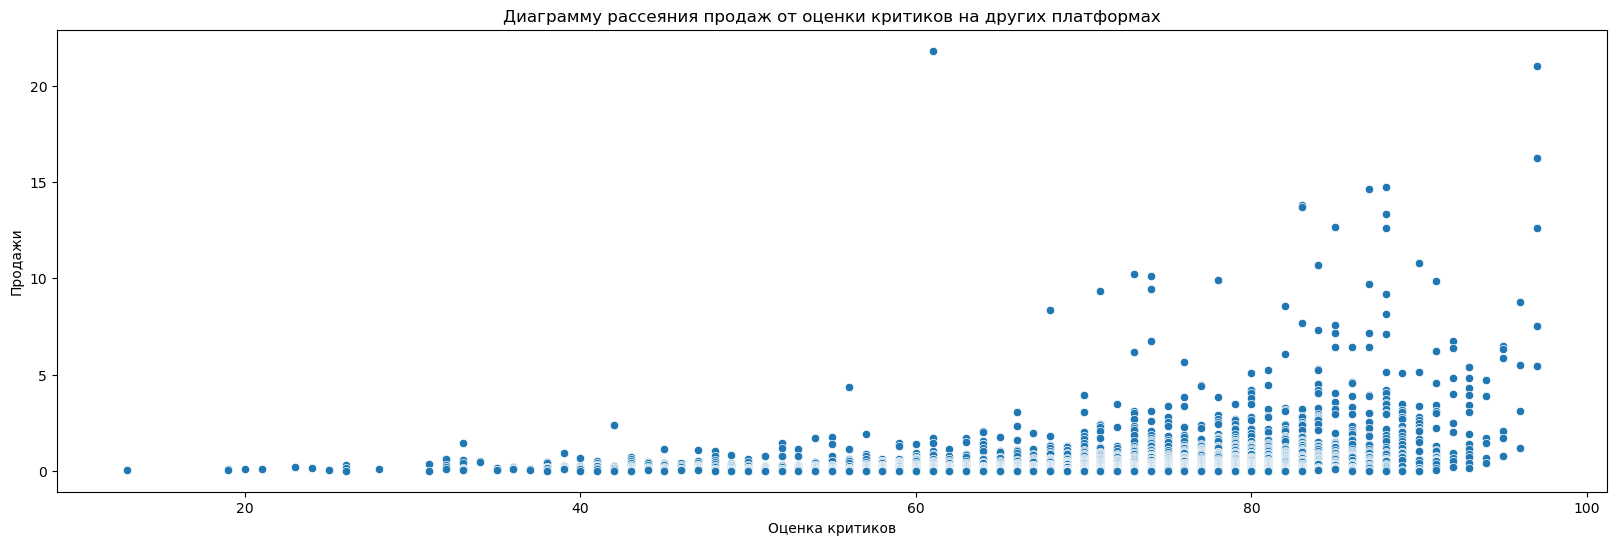

In [41]:
plt.figure(figsize=(20, 6))
sns.scatterplot(data=actual_years, x='critic_score', y='all_sales')
plt.title('Диаграмму рассеяния продаж от оценки критиков на других платформах')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

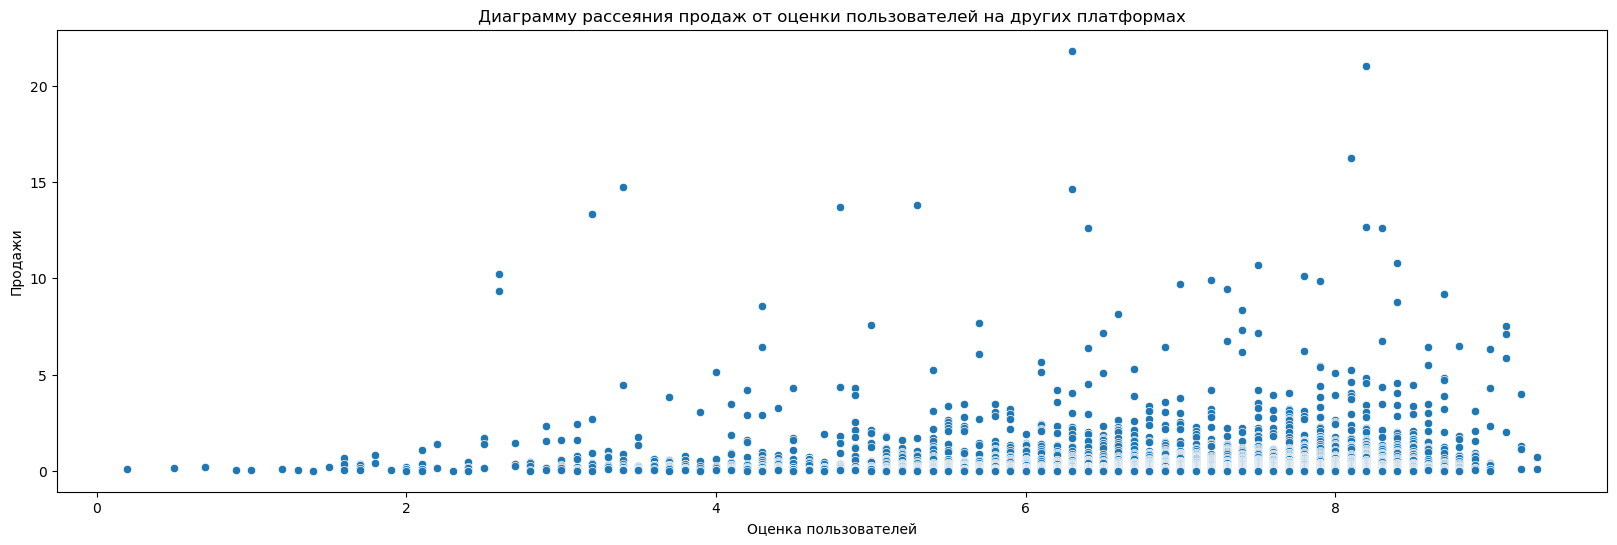

In [42]:
plt.figure(figsize=(20, 6))
sns.scatterplot(data=actual_years, x='user_score', y='all_sales')
plt.title('Диаграмму рассеяния продаж от оценки пользователей на других платформах')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

Закономерность платформы x360 сохранилась и на других платформах:
- если критики оценивают игру 70+ баллов, то и продажи данной игры логически растут;
- слабая зависимость продажи игр с оценкой пользователей;

## Посмотрим на общее распределение игр по жанрам:

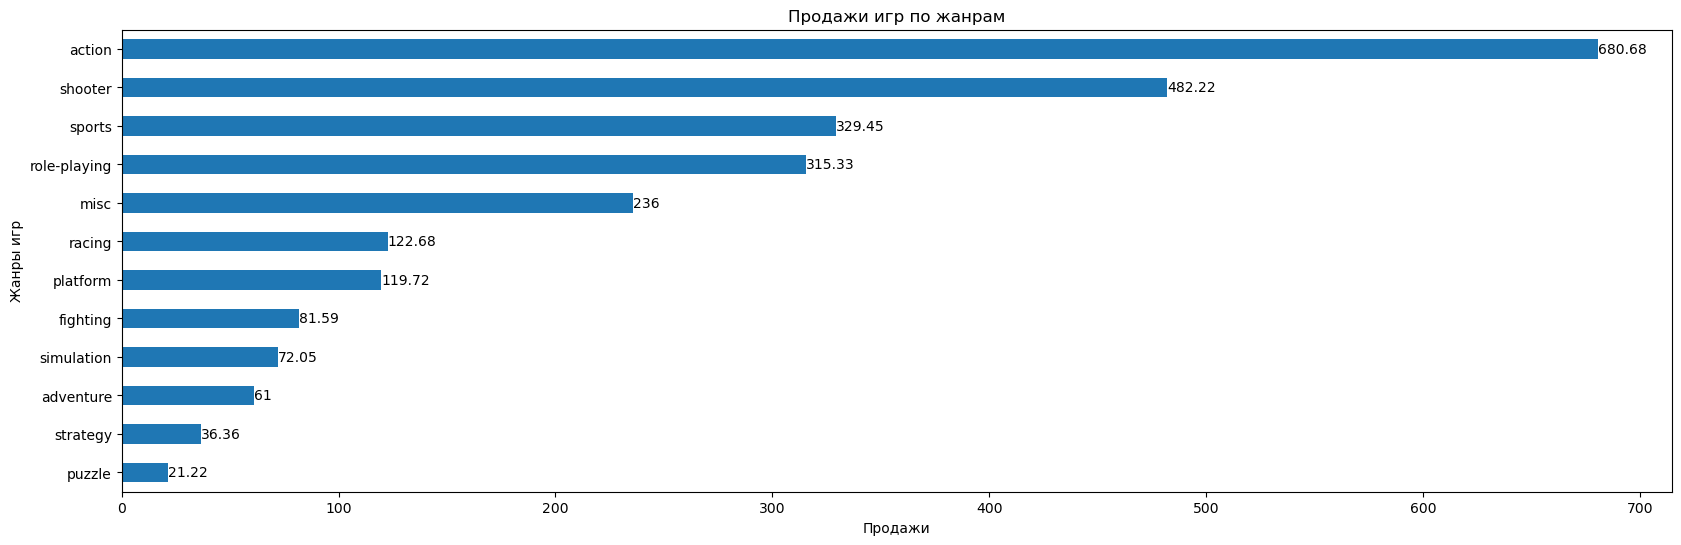

In [43]:
plt.figure(figsize=(20, 6))
ax = actual_years.groupby('genre')['all_sales'].sum().sort_values().plot(kind='barh')
ax.bar_label(ax.containers[0]) # значения
plt.title('Продажи игр по жанрам')
plt.xlabel('Продажи')
plt.ylabel('Жанры игр')
plt.show()

- с 2010 года выпускались игры 12-ти жанров;
- первую строчку по продажам занимает жанр экшен(action);
- последнюю строчку занимает по продажам занимает жанр пазл(puzzle);
- благодаря графику можем понять, что чем активнее жанр, тем больше геймеров покупают эти игры;

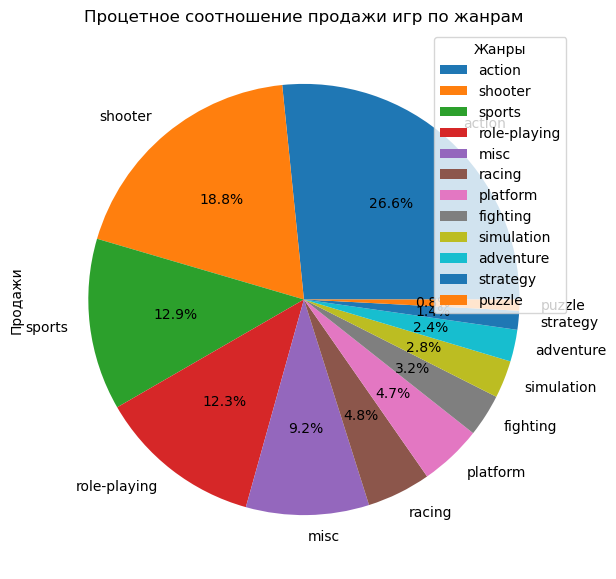

In [44]:
plt.figure(figsize=(7, 7))
actual_years.groupby('genre')['all_sales'].sum().sort_values(ascending=False).plot(kind='pie', autopct='%0.1f%%')
plt.title('Процетное соотношение продажи игр по жанрам')
plt.ylabel('Продажи')
plt.legend(loc='upper right',title='Жанры')
plt.show()

Процентное соотношение самых продаваемых жанров:
1. action(26.6%);
2. shooter(18.8%);
3. sports(12.9%);
4. role-playing(12.3%);
5. misc(9.2%);

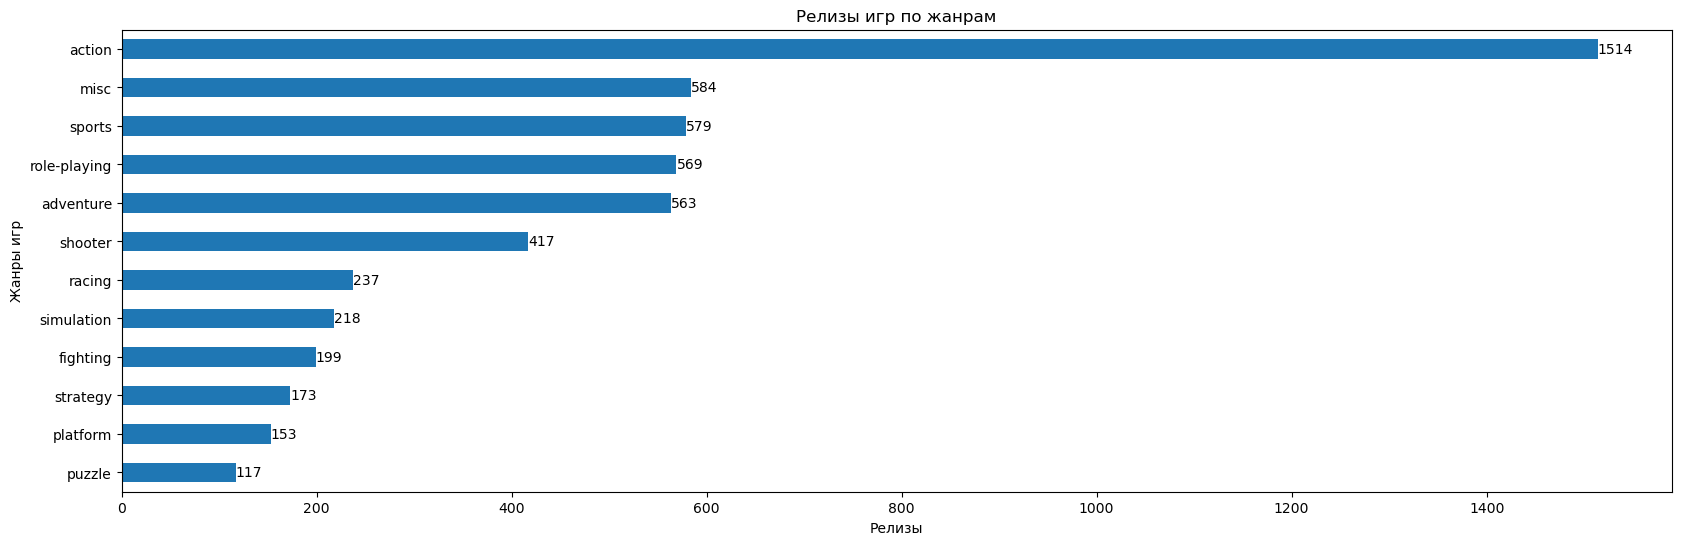

In [45]:
plt.figure(figsize=(20, 6))
ax = actual_years.groupby('genre')['name'].count().sort_values().plot(kind='barh')
ax.bar_label(ax.containers[0]) # значения
plt.title('Релизы игр по жанрам')
plt.xlabel('Релизы')
plt.ylabel('Жанры игр')
plt.show()

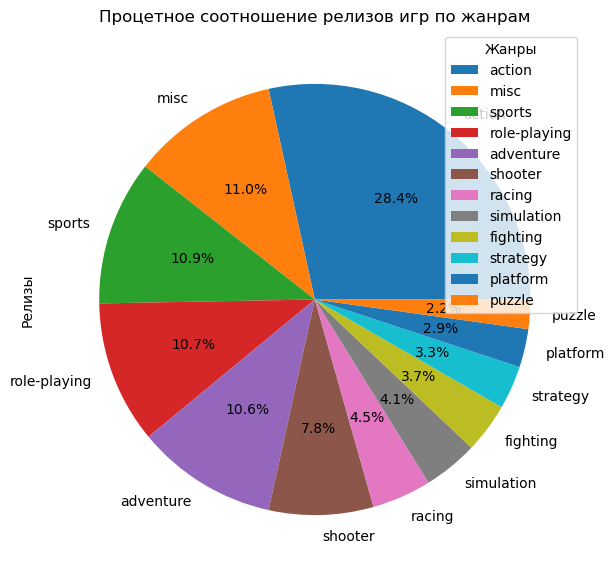

In [46]:
plt.figure(figsize=(7, 7))
actual_years.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='pie', autopct='%0.1f%%')
plt.title('Процетное соотношение релизов игр по жанрам')
plt.ylabel('Релизы')
plt.legend(loc='upper right', title='Жанры')
plt.show()

Процетное соотношение количества релизов по жанрам:
1. action(28.4%);
2. misc(11%);
3. sports(10.9%);
4. role-playing(10.7%);
5. adventure(10.6%);

От сюда следует вывод, что разработчики стремятся сделать экшен-игру, так как данный жанр занимает первую строчку по продажам на игровых платформах.

# Шаг 4: Составим портрет пользователя каждого региона

## Самые популярные платформы (топ-5):

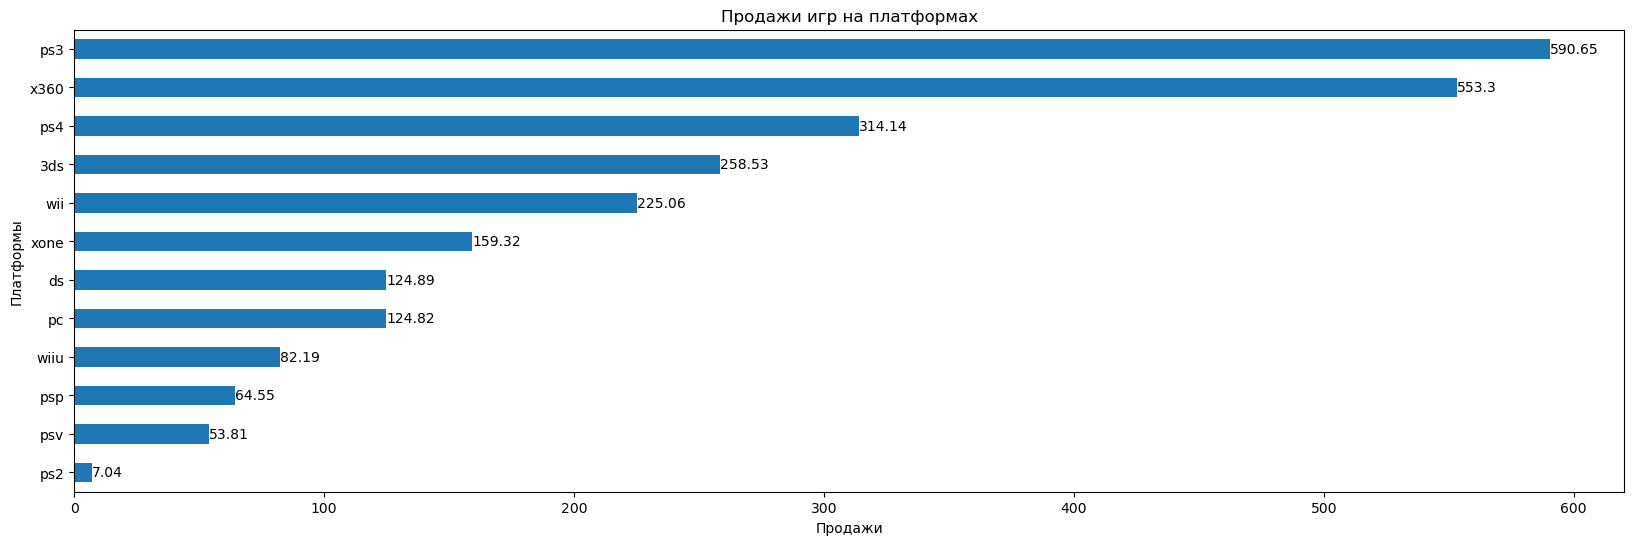

In [47]:
plt.figure(figsize=(20, 6))
ax = actual_years.groupby('platform')['all_sales'].sum().sort_values().plot(kind='barh')
ax.bar_label(ax.containers[0]) # значения
plt.title('Продажи игр на платформах')
plt.xlabel('Продажи')
plt.ylabel('Платформы')
plt.show()

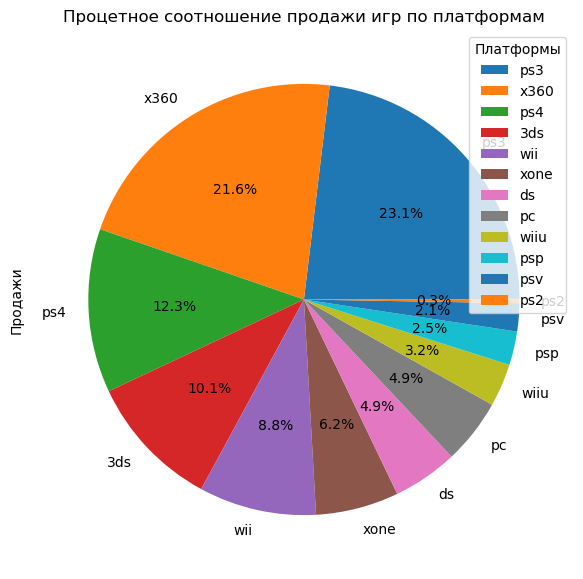

In [48]:
plt.figure(figsize=(7, 7))
actual_years.groupby('platform')['all_sales'].sum().sort_values(ascending=False).plot(kind='pie', autopct='%0.1f%%')
plt.title('Процетное соотношение продажи игр по платформам')
plt.ylabel('Продажи')
plt.legend(loc='upper right', title='Платформы')
plt.show()

Топ 5 платформ по продажам игр:
1. ps3 - 23.1%;
2. x360 - 21.6%;
3. ps4 - 12.3%;
4. 3ds - 10.1%;
5. wii - 8.8%;

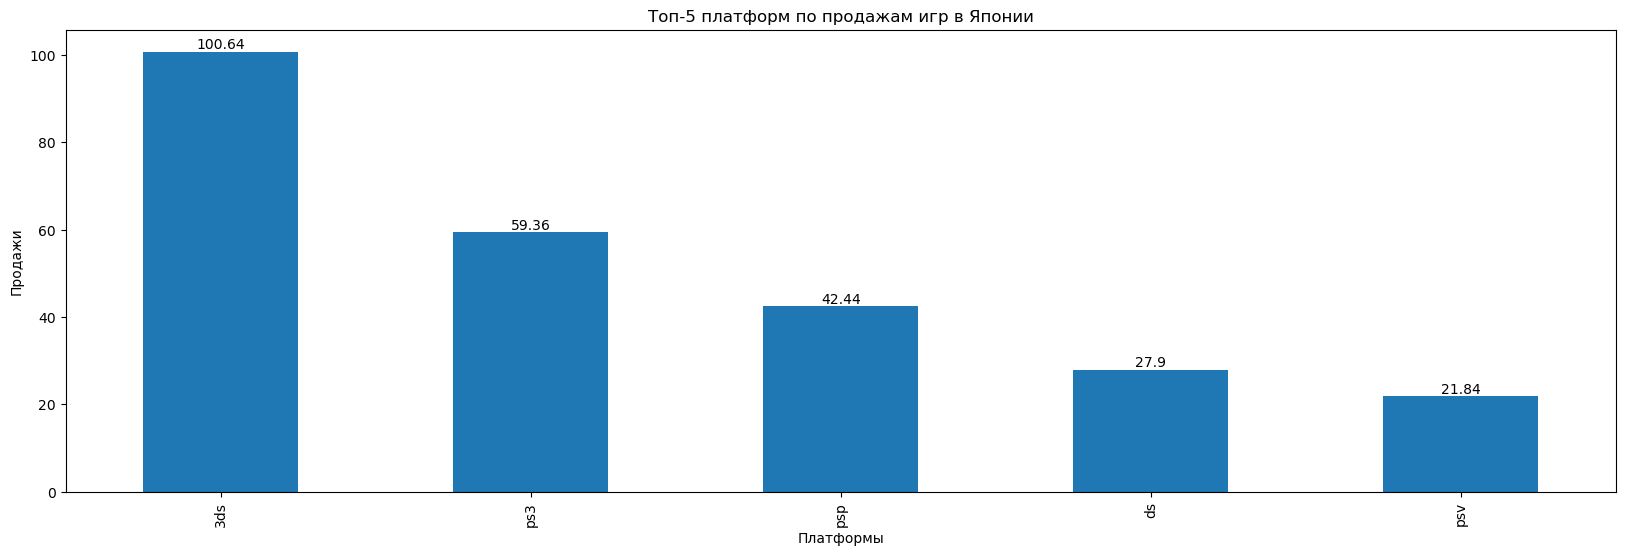

In [49]:
plt.figure(figsize=(20,6))
ax = actual_years.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
ax.bar_label(ax.containers[0]) # значения
plt.title('Топ-5 платформ по продажам игр в Японии')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

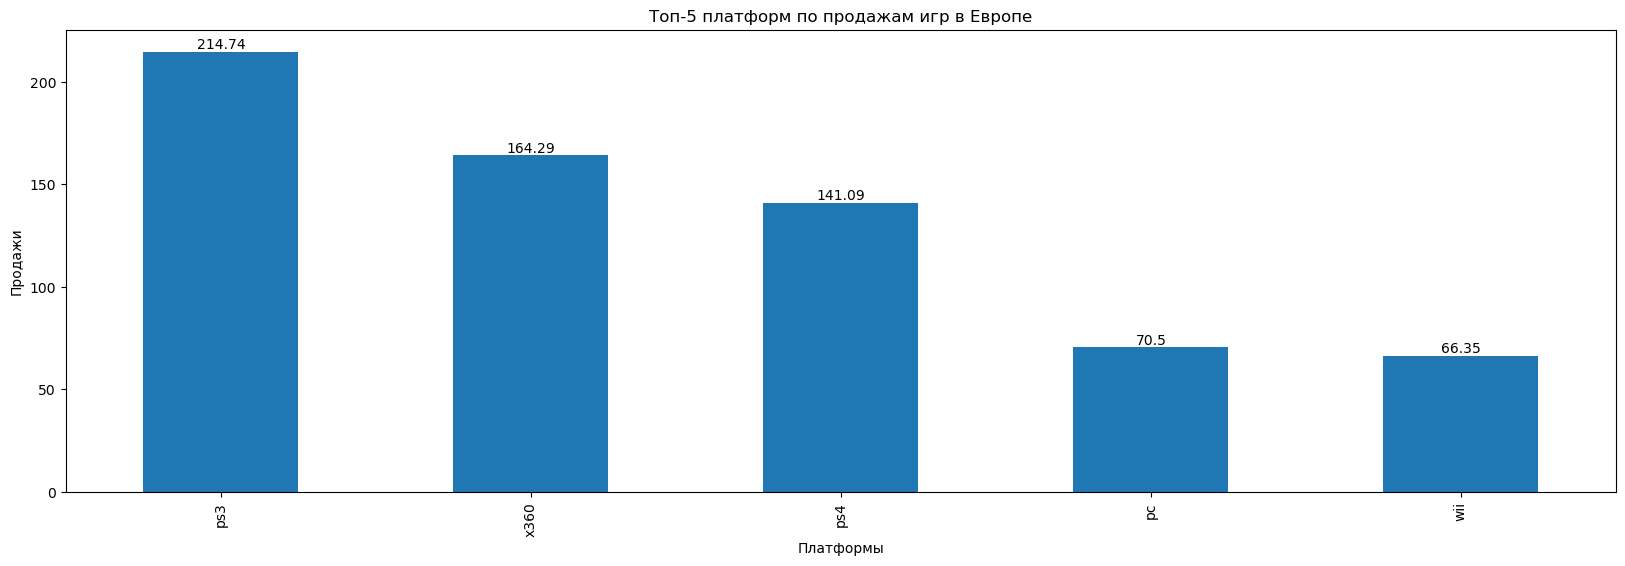

In [50]:
plt.figure(figsize=(20,6))
ax = actual_years.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
ax.bar_label(ax.containers[0]) # значения
plt.title('Топ-5 платформ по продажам игр в Европе')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

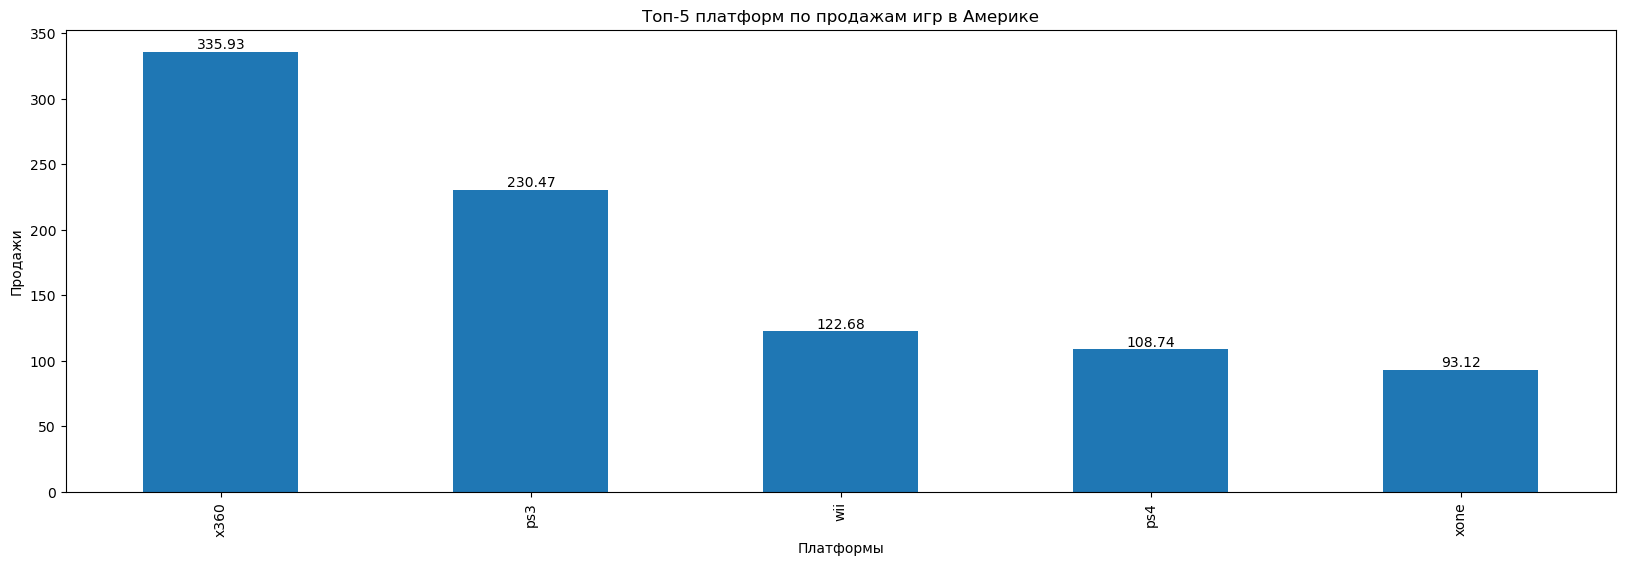

In [51]:
plt.figure(figsize=(20,6))
ax = actual_years.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
ax.bar_label(ax.containers[0]) # значения
plt.title('Топ-5 платформ по продажам игр в Америке')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

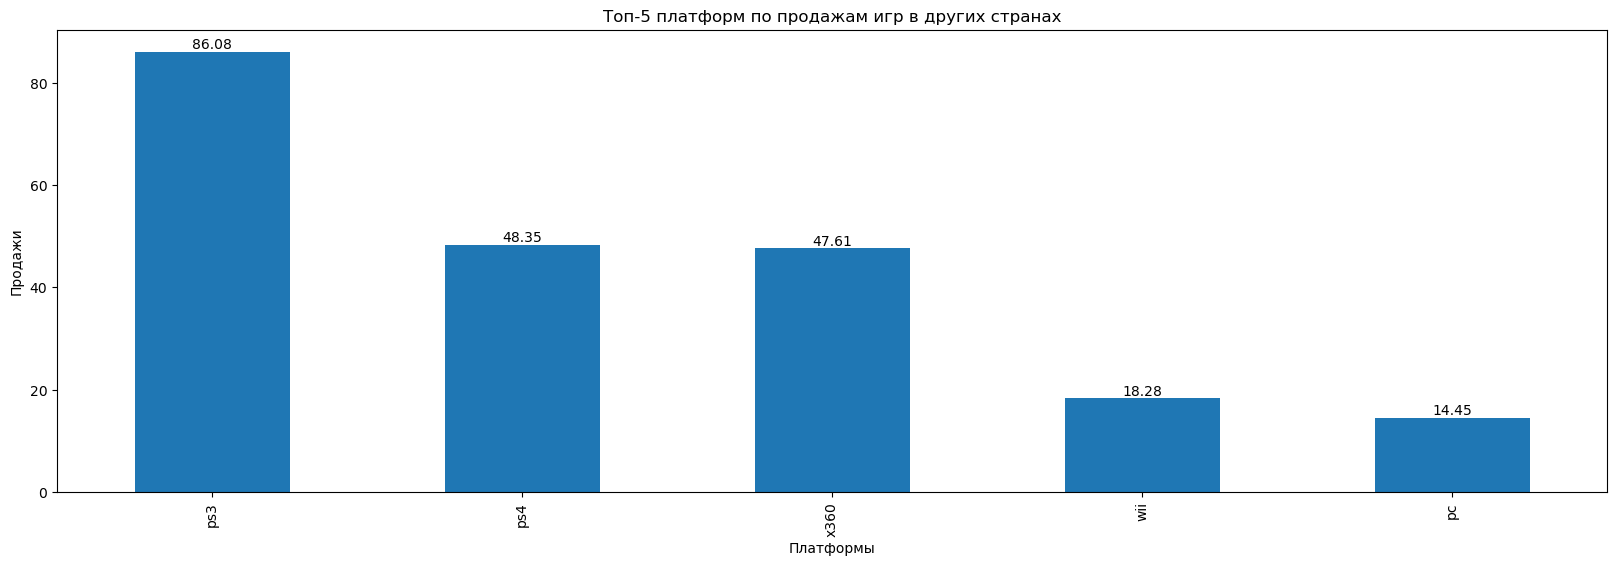

In [52]:
plt.figure(figsize=(20,6))
ax = actual_years.groupby('platform')['other_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
ax.bar_label(ax.containers[0]) # значения
plt.title('Топ-5 платформ по продажам игр в других странах')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

- в Японии популярная платформа по продажам игр - 3ds;
- в Европе популярная платформа по продажам игр - ps3;
- в Америке популярная платформа по продажам игр - x360;
- в других странах популярная платформа по продажам игр - ps3;

## Самые популярные жанры (топ-5):

Для удобства создадим отдельный pivot_table жанров с продажами всех регионов:

In [53]:
top_genre = actual_years.pivot_table(
    index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales'], 
    aggfunc={
        'na_sales': 'sum', 
        'eu_sales': 'sum', 
        'jp_sales': 'sum', 
        'other_sales': 'sum', 
        'all_sales': 'sum'}).sort_values(
            by='all_sales', ascending=False
        ).reset_index()
top_genre

,genre,all_sales,eu_sales,jp_sales,na_sales,other_sales
0,action,680.68,236.70,72.21,294.26,77.51
1,shooter,482.22,172.57,14.05,238.50,57.10
2,sports,329.45,117.09,15.53,157.49,39.34
3,role-playing,315.33,75.48,103.59,112.05,24.21
4,misc,236.00,66.55,24.54,124.39,20.52
5,racing,122.68,54.75,6.68,46.11,15.14
6,platform,119.72,38.30,15.81,54.90,10.71
7,fighting,81.59,20.33,13.90,39.05,8.31
8,simulation,72.05,26.39,13.30,26.67,5.69
9,adventure,61.00,18.88,15.67,20.84,5.61


Построим графики:

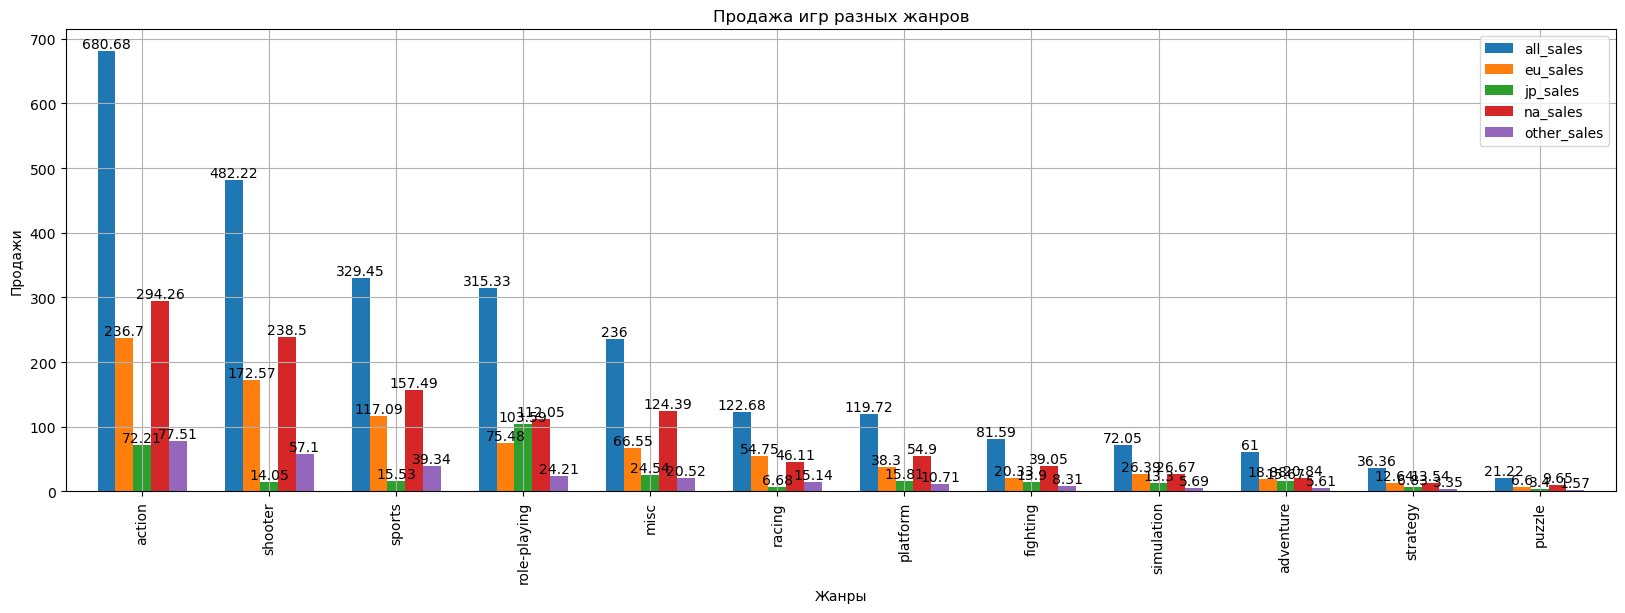

In [54]:
ax = top_genre.plot(kind='bar', x='genre', figsize=(20, 6), width=0.7)
for container in ax.containers: # значения
    ax.bar_label(container)
plt.title('Продажа игр разных жанров')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.grid()
plt.show()

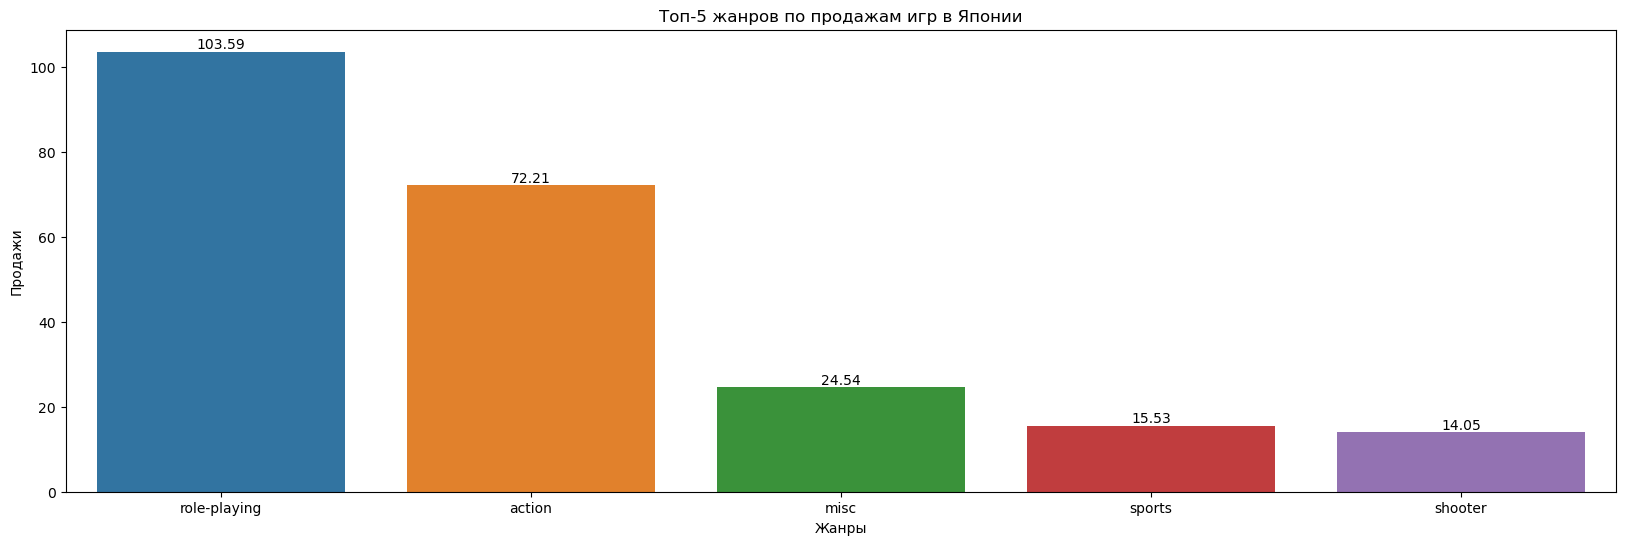

In [55]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=top_genre.head(5).sort_values(by='jp_sales', ascending=False), x='genre', y='jp_sales')
ax.bar_label(ax.containers[0]) # значения
plt.title('Топ-5 жанров по продажам игр в Японии')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

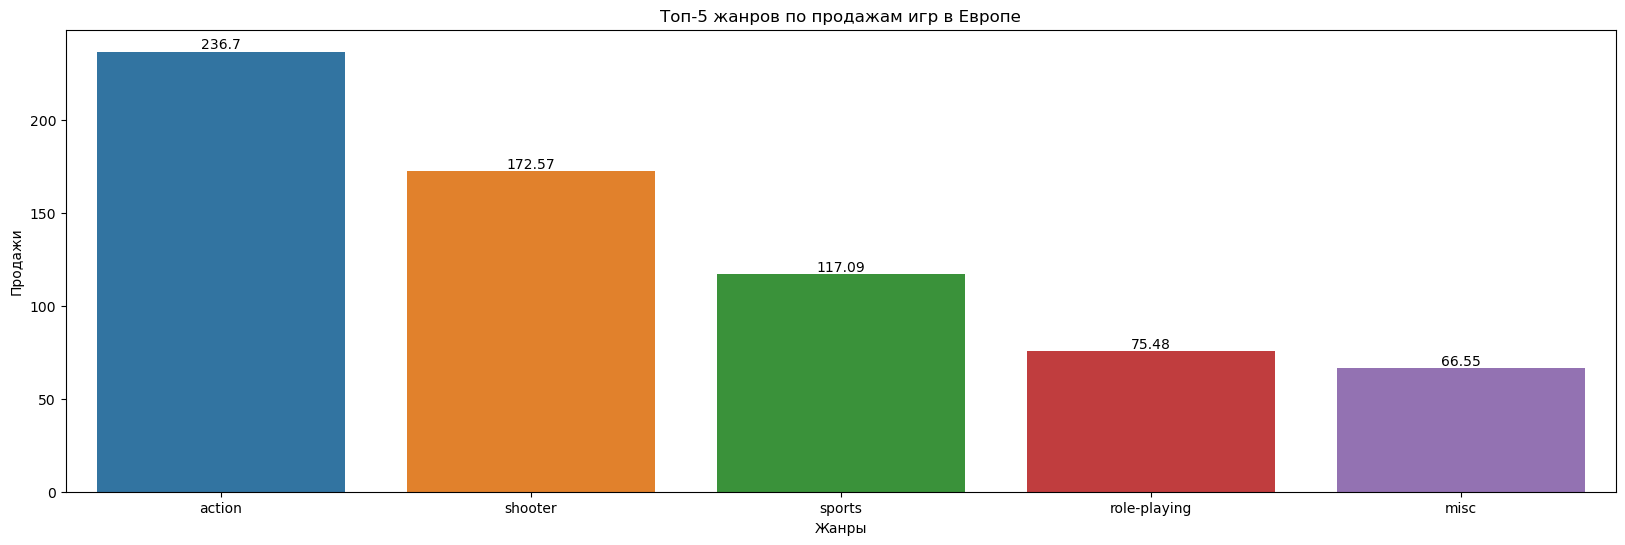

In [56]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=top_genre.head(5).sort_values(by='eu_sales', ascending=False), x='genre', y='eu_sales')
ax.bar_label(ax.containers[0]) # значения
plt.title('Топ-5 жанров по продажам игр в Европе')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

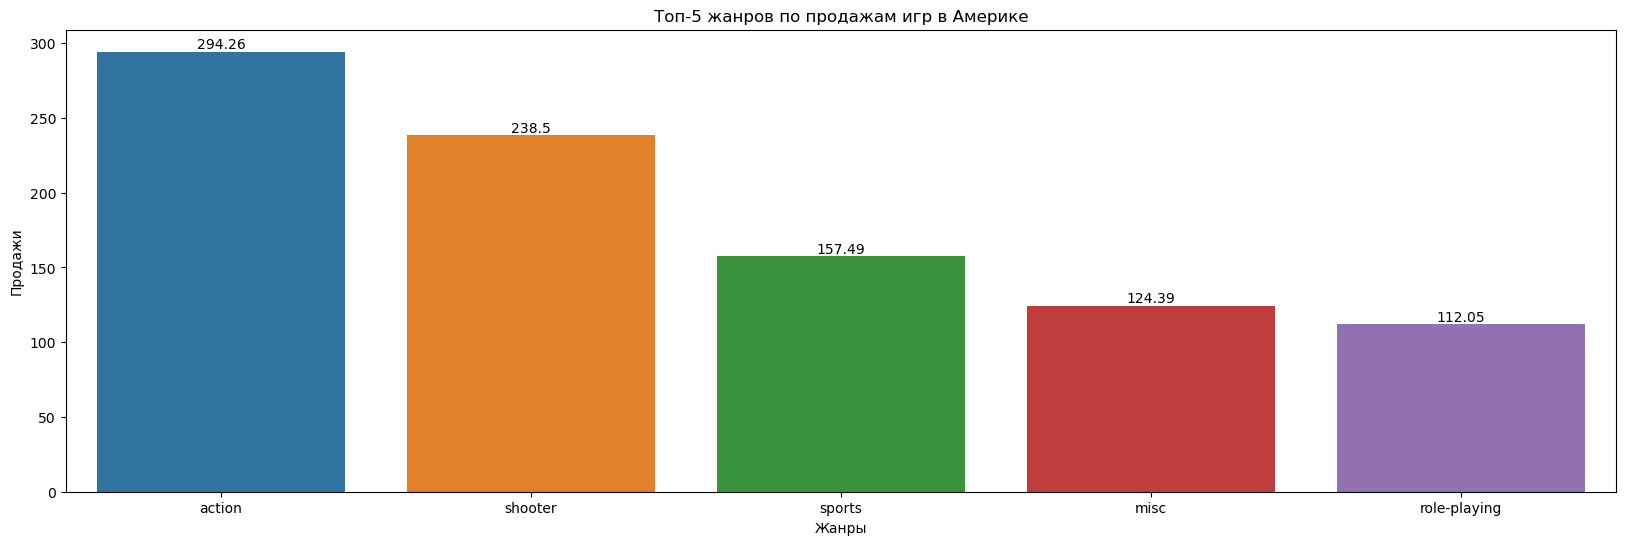

In [57]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=top_genre.head(5).sort_values(by='na_sales', ascending=False), x='genre', y='na_sales')
ax.bar_label(ax.containers[0]) # значения
plt.title('Топ-5 жанров по продажам игр в Америке')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

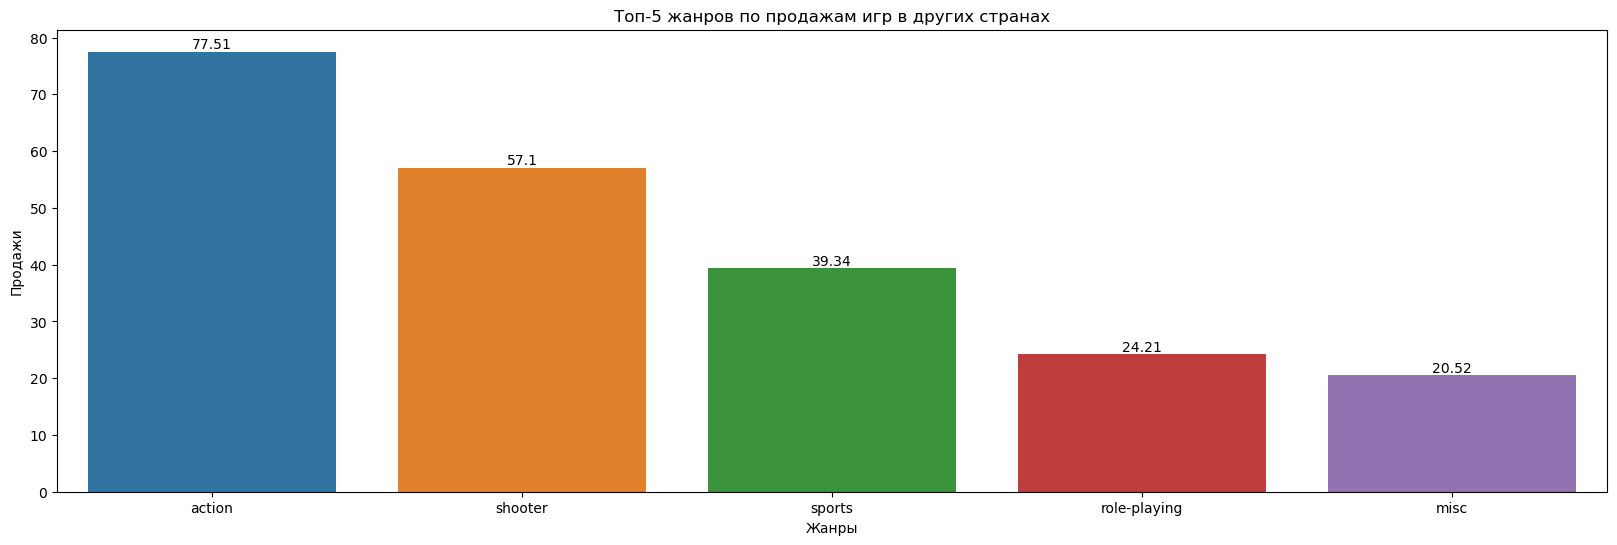

In [58]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=top_genre.head(5).sort_values(by='other_sales', ascending=False), x='genre', y='other_sales')
ax.bar_label(ax.containers[0]) # значения
plt.title('Топ-5 жанров по продажам игр в других странах')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

- в Японии популярный жанр по продажам игр - role-playing;
- в Европе популярный жанр по продажам игр - action;
- в Америке популярный жанр по продажам игр - action;
- в других странах популярный жанр по продажам игр - action;

Жанр экшен самый популярный во всех странах, кроме страны восходящего солнца - Японии.

## Влияние рейтинга ESRB на продажи в отдельных регионах:

* EC - для всех старше 3 лет
* K-A - 6+ лет версия до 1997 года
* E10+ - для всех старше 10 лет
* Т - для всех старше 13 лет
* M - для всех старше 17 лет
* RP - ожидается рейтинг 17+, окончательный рейтинг еще не присвоен
* AO - для всех взрослых старше 18 лет
* E - для всех
* Undefined - не определено;

Не будем учитывать рейтинг RP, потому что окончательный рейтинг еще не присвоен и не будем учитывать не определенный рейтинг undefined:

In [59]:
esrb_rating = actual_years.loc[(actual_years['rating'] != 'rp') & (actual_years['rating'] != 'undefined')]
esrb_rating['rating'].unique()

array(['e', 'm', 'e10+', 't', 'ec'], dtype=object)

Сделаем для удобства pivot_table так же как и с жанрами, только теперь с ESRB рейтингом:

In [60]:
top_esrb_rating = esrb_rating.pivot_table(
    index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales'], 
    aggfunc={
        'na_sales': 'sum', 
        'eu_sales': 'sum', 
        'jp_sales': 'sum', 
        'other_sales': 'sum', 
        'all_sales': 'sum'}).sort_values(
            by='all_sales', ascending=False
        ).reset_index()
top_esrb_rating

,rating,all_sales,eu_sales,jp_sales,na_sales,other_sales
0,m,806.59,294.29,30.47,384.23,97.60
1,e,579.11,197.98,47.87,272.93,60.33
2,t,355.42,113.29,42.14,161.21,38.78
3,e10+,307.69,101.16,13.22,161.61,31.70
4,ec,1.20,0.00,0.00,1.13,0.07


Построим графики:

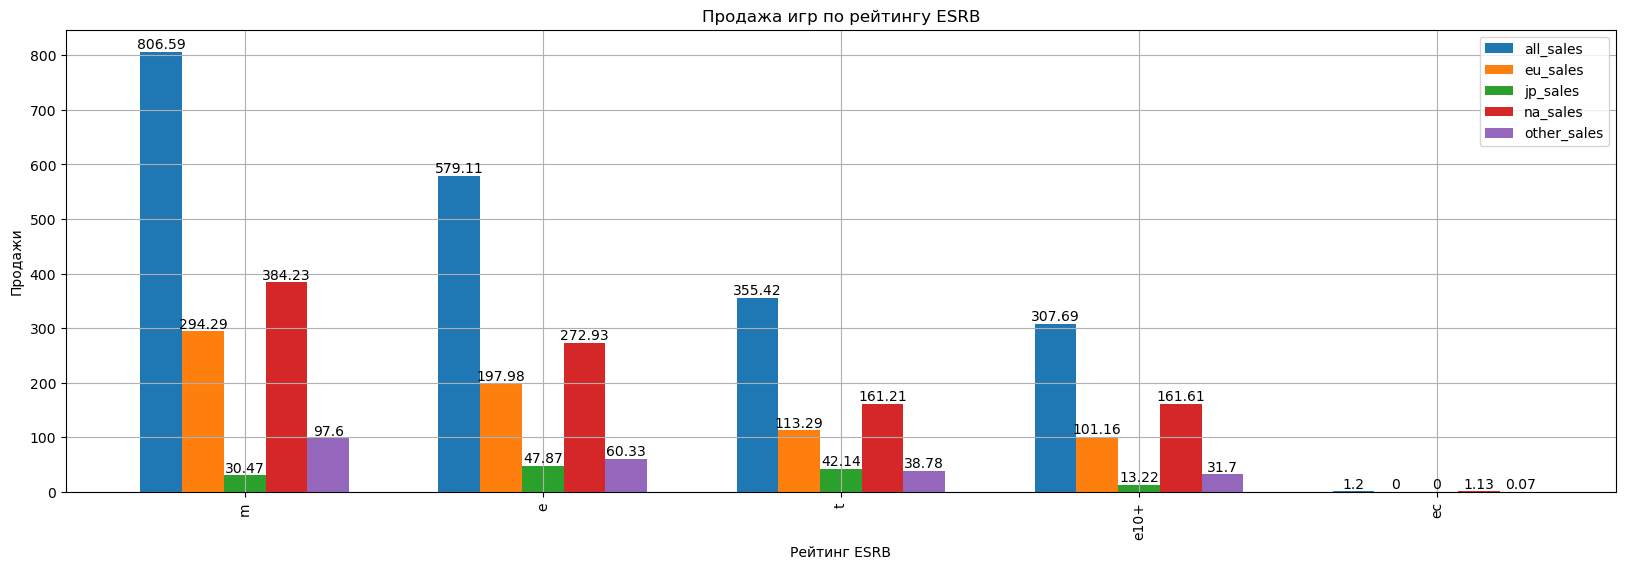

In [61]:
ax = top_esrb_rating.plot(kind='bar', x='rating', figsize=(20, 6), width=0.7)
for container in ax.containers: # значения
    ax.bar_label(container)
plt.title('Продажа игр по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.grid()
plt.show()

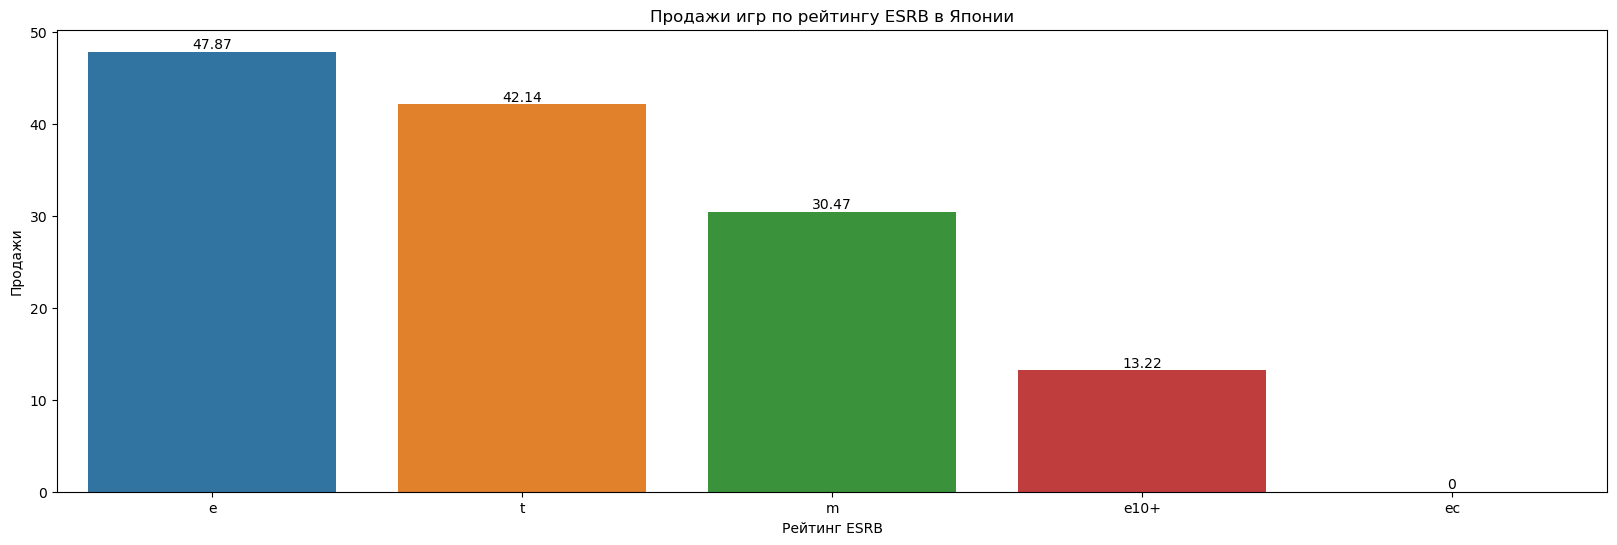

In [62]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=top_esrb_rating.head(5).sort_values(by='jp_sales', ascending=False), x='rating', y='jp_sales')
ax.bar_label(ax.containers[0]) # значения
plt.title('Продажи игр по рейтингу ESRB в Японии')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.show()

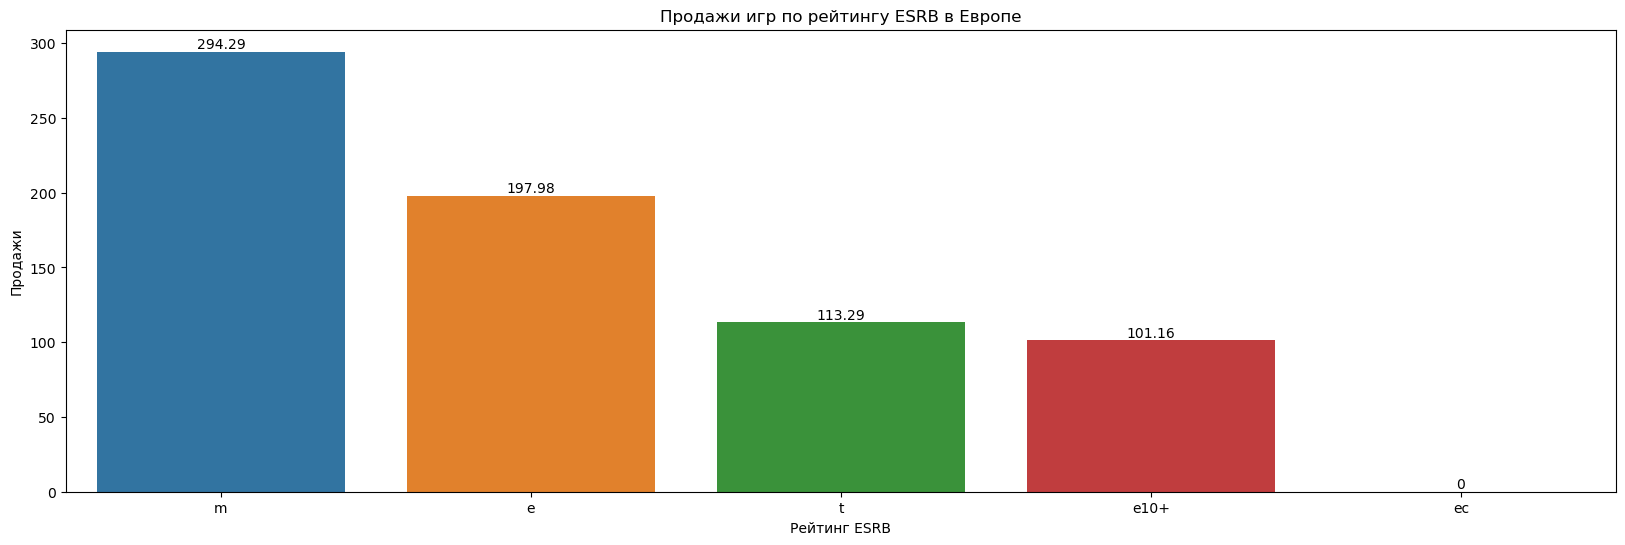

In [63]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=top_esrb_rating.head(5).sort_values(by='eu_sales', ascending=False), x='rating', y='eu_sales')
ax.bar_label(ax.containers[0]) # значения
plt.title('Продажи игр по рейтингу ESRB в Европе')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.show()

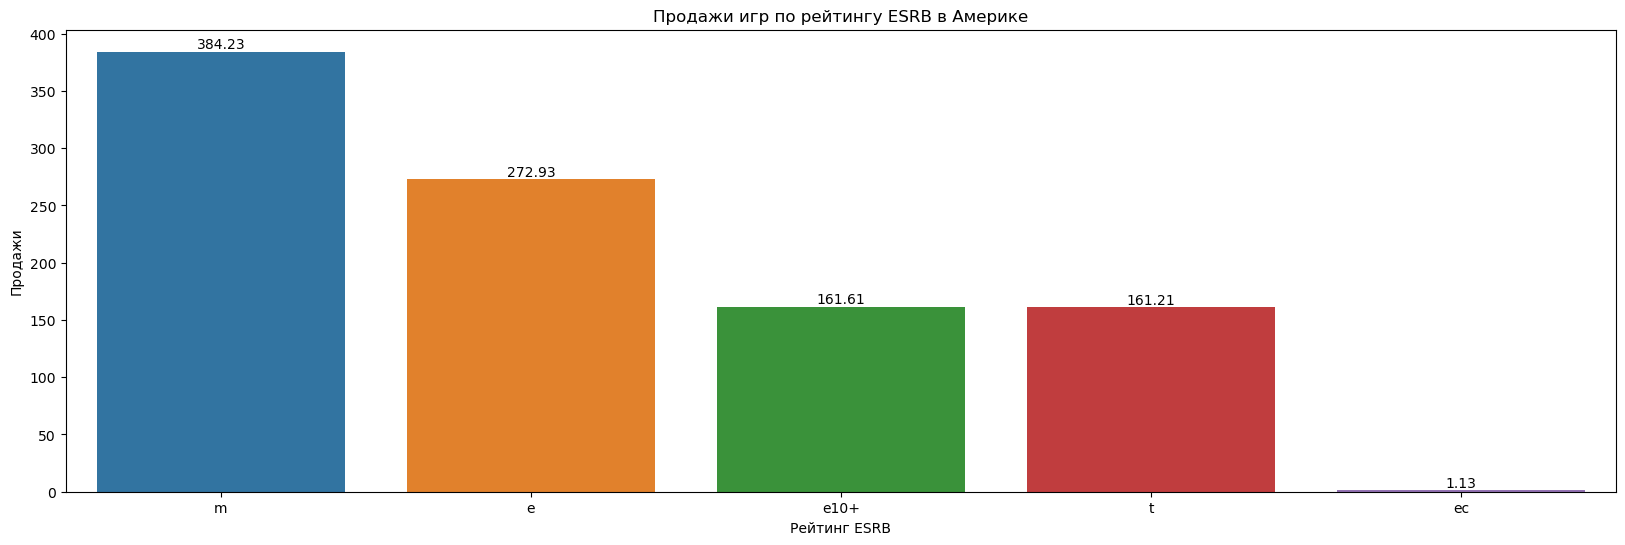

In [64]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=top_esrb_rating.head(5).sort_values(by='na_sales', ascending=False), x='rating', y='na_sales')
ax.bar_label(ax.containers[0]) # значения
plt.title('Продажи игр по рейтингу ESRB в Америке')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.show()

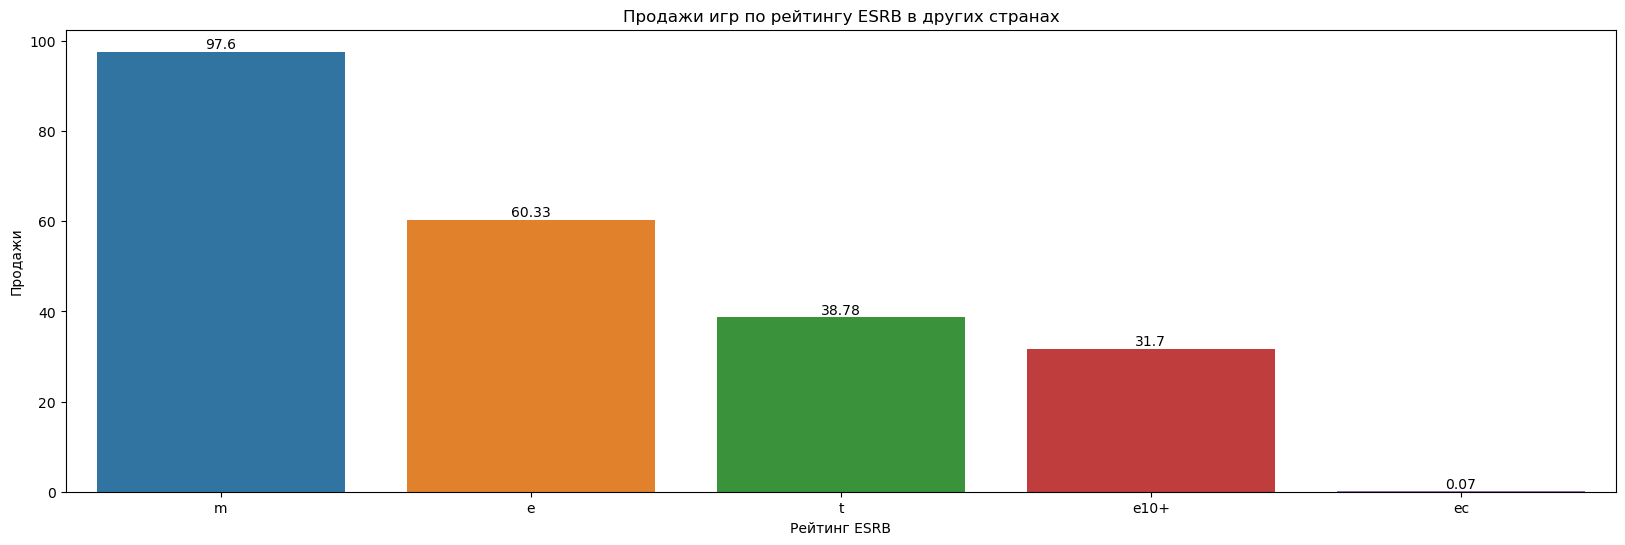

In [65]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=top_esrb_rating.head(5).sort_values(by='other_sales', ascending=False), x='rating', y='other_sales')
ax.bar_label(ax.containers[0]) # значения
plt.title('Продажи игр по рейтингу ESRB в других странах')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.show()

- в Японии лидирует по продажам, игры с ESRB рейтингом - E;
- в Европе лидирует по продажам, игры с ESRB рейтингом - M;
- в Америке лидирует по продажам, игры с ESRB рейтингом - M;
- в других странах лидирует по продажам, игры с ESRB рейтингом - M;

1. Американцы предпочитают платформу x360, японцы предпочитают платформу 3ds, европейцы и жители других стран предпочитают платформу ps3;
2. Жители страны восходящего солнца предпочитают играть игры с жанром role-playing, в остальных регионах предпочитают игры с жанром action;
3. Так же японцы отличаются еще одним фактом, что в их регионе лидируют продажи игр с ESRB рейтингом - E (игры для всех возрастов);
4. В остальных же регионах лидируют продажи игр с ESRB рейтингом - M (игры для лиц старше 17-ти лет);

# Шаг 5: Проверим гипотезы

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:

1. H0 - нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2. H1 - альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются;

Чтобы совершить проверку гипотезы, отфильтруем наш актуальный df, на платформы - pc и xone:

In [66]:
pc = actual_years.loc[(actual_years['platform'] == 'pc') & (actual_years['user_score'].notna())]
xone = actual_years.loc[(actual_years['platform'] == 'xone') & (actual_years['user_score'].notna())]

Проверка гипотезы:

In [67]:
alpha = 0.05
results = st.ttest_ind(pc['user_score'], xone['user_score']) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.9540157700336299
Не получилось отвергнуть нулевую гипотезу


Вывод: мы не можем отвергнуть "H0 - нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые", так как игры на платформах Xbox One и PC с высокой вероятностью имеют одинаковый средний пользователский рейтинг

## Средние пользовательские рейтинги жанров Action и Sports разные:

1. H0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые;

2. H1 - Средние пользовательские рейтинги жанров Action и Sports разные;

Чтобы совершить проверку гипотезы, отфильтруем наш актуальный df, на жанры - action и sports:

In [68]:
action = actual_years.loc[(actual_years['genre'] == 'action') & (actual_years['user_score'].notna())]
sports = actual_years.loc[(actual_years['genre'] == 'sports') & (actual_years['user_score'].notna())]

Проверка гипотезы:

In [69]:
alpha = 0.05
results = st.ttest_ind(action['user_score'], sports['user_score']) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.0565530647157677e-19
Отвергаем нулевую гипотезу


Вывод: мы отвергаем "H0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые", так как игры с жанром Action и Sports с высокой вероятностью имеют разный средний пользователский рейтинг

# Шаг 6: Общий вывод

- Максимальный пик выходов релизов (1440 релизов) был замечен в 2009 году, дальше мы наблюдаем спад до 2016 года. Можем предположить, что это связано с развитием мобильного гейминга и то что молодые платформы еще не дошли до своего пика;
- В исследовании мы узнали среднюю жизнь всех платформ (8лет), а так же и среднюю жизнь топовых платформ, которая уже составляет (13лет);
- Исходя из жизни топовых платформ (13/2=6.5) мы смогли определить актуальный временной промежуток (с 2010г. по 2016г.) для анализа;
- Прослеживается закономерность у платформ, что их пик успеха наступает на середине жизни, но потом закономерный спад и прекращение выходов релизов и продажи игр на данной платформе, так как железо устаревает и становится не актуальным. На место устаревшей платформе приходит более новая с обновленным железом у которой хватает мощности для актуальных релизов. В качестве примера может взять платформы xbox 360 и ps3, на их замену с более обновленным железом пришли платформы xbox one и ps4;
- Из анализа мы узнали, что японцы предпочитают платформу - 3ds, американцы предпочитают платформу - xbox 360, европейцы и жители других стран преподчитают платформу ps3;
- На общей картине топовый жанр по продажам и релизам игр это action, а самый не популярный puzzle;
- Только в Японии по продажам лидируют игры с жанром role-playing, в остальных же странах в топе по продажам жанр action;
- Так же японцы отличаются еще одним фактом, что в их регионе лидируют продажи игр с ESRB рейтингом - E (игры для всех возрастов). В остальных же регионах лидируют продажи игр с ESRB рейтингом - M (игры для лиц старше 17-ти лет);
- В анализе мы так же узнали, что пользовательские оценки особо не влияют на продажи игр. А вот оценки критиков влияют на продажи. Если критики ставят оценку 70+, то продажи игр заметно повышаются;
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные;